In [1]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 18.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=49d2c24ed8b68c28bb0db264c9290d54a244ef6e857719fe7e6c461aae2f3c4c
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [2]:
#Importing necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import shap
from scipy.stats import spearmanr
from uuid import uuid4
import lime.lime_tabular
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
import os
import warnings
from tensorflow.keras.layers import Bidirectional
from IPython.display import Image, display
import matplotlib.dates as mdates
%matplotlib inline

# Create directory for saving plots
plot_dir = r'C:\Users\Hp\Desktop\LJMU_research\Final Thesis\plots'
os.makedirs(plot_dir, exist_ok=True)

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib
#matplotlib.use('Agg')  # Use non-interactive backend for file saving
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import lime
import lime.lime_tabular
from scipy.stats import spearmanr
import warnings
import os

In [4]:
from google.colab import files
uploaded = files.upload()

Saving climatic_data_raw.csv to climatic_data_raw.csv


In [61]:
del climatic_data

In [5]:
# Load and preprocess data
climatic_data = pd.read_csv('climatic_data_raw.csv')

In [6]:
climatic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
#convert date column to date datatype
climatic_data['Date'] = pd.to_datetime(climatic_data['Date'])

In [8]:
print(climatic_data['Date'].dtype)

datetime64[ns]


In [9]:
#changing index
climatic_data.set_index('Date', inplace=True)

In [10]:
climatic_data

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
Date                                                                     
2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...             ...      ...      ...       ...          ...       ...   
2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

           WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Humidity9am  \
Date                                                         ...                
2008-12-01           W           44.0          W        WNW  ...         71.0   
2008-12-02         WNW           44.0        NNW        WSW  ...         44.0   
2008-12-03         WSW           46.0          W        WSW  ...         38.0   
2008-12-04          NE           24.0         SE          E  ...         45.0   
2008-12-05           W           41.0        ENE         NW  ...         82.0   
...                ...            ...        ...        ...  ...          ...   
2017-06-21           E           31.0         SE        ENE  ...         51.0   
2017-06-22         NNW           22.0         SE          N  ...         56.0   
2017-06-23           N           37.0         SE        WNW  ...         53.0   
2017-06-24          SE           28.0        SSE          N  ...         51.0   
2017-06-25         NaN            NaN        ESE        ESE  ...         62.0   

            Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  \
Date                                                                    
2008-12-01         22.0       1007.7       1007.1       8.0       NaN   
2008-12-02         25.0       1010.6       1007.8       NaN       NaN   
2008-12-03         30.0       1007.6       1008.7       NaN       2.0   
2008-12-04         16.0       1017.6       1012.8       NaN       NaN   
2008-12-05         33.0       1010.8       1006.0       7.0       8.0   
...                 ...          ...          ...       ...       ...   
2017-06-21         24.0       1024.6       1020.3       NaN       NaN   
2017-06-22         21.0       1023.5       1019.1       NaN       NaN   
2017-06-23         24.0       1021.0       1016.8       NaN       NaN   
2017-06-24         24.0       1019.4       1016.5       3.0       2.0   
2017-06-25         36.0       1020.2       1017.9       8.0       8.0   

            Temp9am  Temp3pm  RainToday  RainTomorrow  
Date                                                   
2008-12-01     16.9     21.8         No            No  
2008-12-02     17.2     24.3         No            No  
2008-12-03     21.0     23.2         No            No  
2008-12-04     18.1     26.5         No            No  
2008-12-05     17.8     29.7         No            No  
...             ...      ...        ...           ...  
2017-06-21     10.1     22.4         No            No  
2017-06-22     10.9     24.5         No            No  
2017-06-23     12.5     26.1         No            No  
2017-06-24     15.1     26.0         No            No  
2017-06-25     15.0     20.9         No           NaN  

[145460 rows x 22 columns]

In [11]:
climatic_data.sort_index(inplace=True)

In [12]:
# Define numerical and categorical columns
numerical_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
                  'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
                  'Pressure3pm', 'Temp9am', 'Temp3pm', 'Cloud9am', 'Cloud3pm']
categorical_cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

In [13]:
# Detect missing values
print(climatic_data.isnull().sum())

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


In [14]:
climatic_data.count()

Location         145460
MinTemp          143975
MaxTemp          144199
Rainfall         142199
Evaporation       82670
Sunshine          75625
WindGustDir      135134
WindGustSpeed    135197
WindDir9am       134894
WindDir3pm       141232
WindSpeed9am     143693
WindSpeed3pm     142398
Humidity9am      142806
Humidity3pm      140953
Pressure9am      130395
Pressure3pm      130432
Cloud9am          89572
Cloud3pm          86102
Temp9am          143693
Temp3pm          141851
RainToday        142199
RainTomorrow     142193
dtype: int64

In [15]:
# Handle missing values
for col in numerical_cols:
    climatic_data[col] = climatic_data[col].interpolate(method='linear')


In [16]:
for col in categorical_cols:
    climatic_data[col] = climatic_data[col].ffill()
    imputer = SimpleImputer(strategy='most_frequent')
    climatic_data[col] = imputer.fit_transform(climatic_data[[col]]).ravel()

In [17]:
# Converting wind directions to numerical degrees
wind_map = {'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5, 'E': 90, 'ESE': 112.5,
            'SE': 135, 'SSE': 157.5, 'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5,
            'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5}



In [18]:
for col in ['WindGustDir', 'WindDir9am', 'WindDir3pm']:
    climatic_data[col] = climatic_data[col].map(wind_map)

In [19]:
# Converting wind directions back to categorical for analysis
climatic_data['WindGustDir_cat'] = climatic_data['WindGustDir'].map({v: k for k, v in wind_map.items()})
climatic_data['WindDir9am_cat'] = climatic_data['WindDir9am'].map({v: k for k, v in wind_map.items()})
climatic_data['WindDir3pm_cat'] = climatic_data['WindDir3pm'].map({v: k for k, v in wind_map.items()})

In [20]:
# Outlier detection and visualization (before capping)
def detect_outliers(df, columns):
    outlier_indices = []
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outlier_indices.extend(outliers)
        # Visualize outliers with box plot
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df[col])
        plt.title(f'Box Plot of {col} (Before Capping)')
        plt.savefig(os.path.join(plot_dir, f'boxplot_before_{col}.png'))
        plt.show()
        plt.close()
    return list(set(outlier_indices))

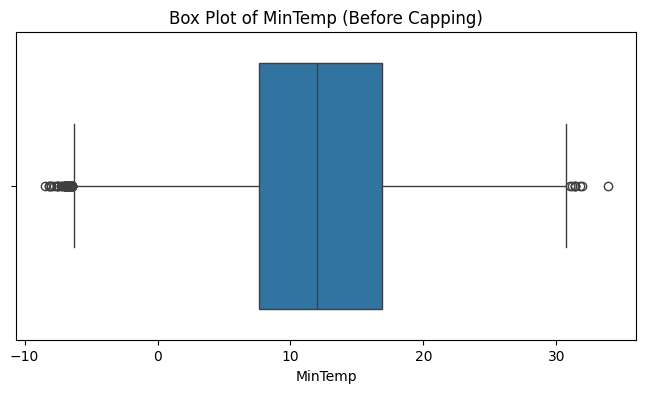

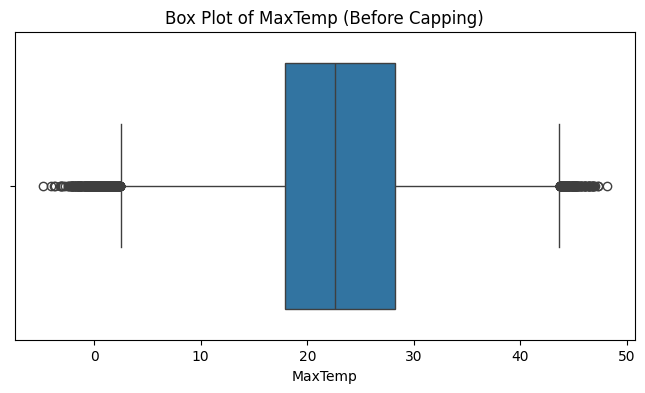

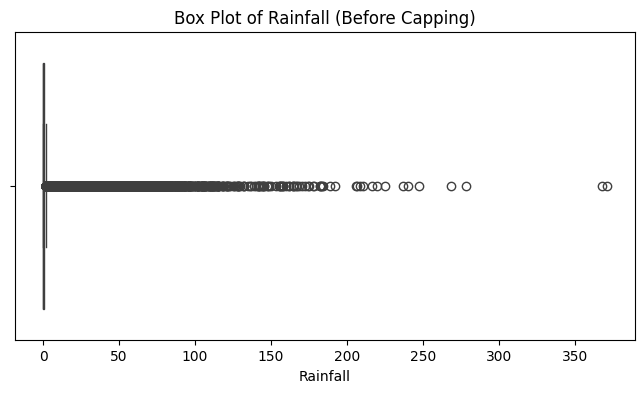

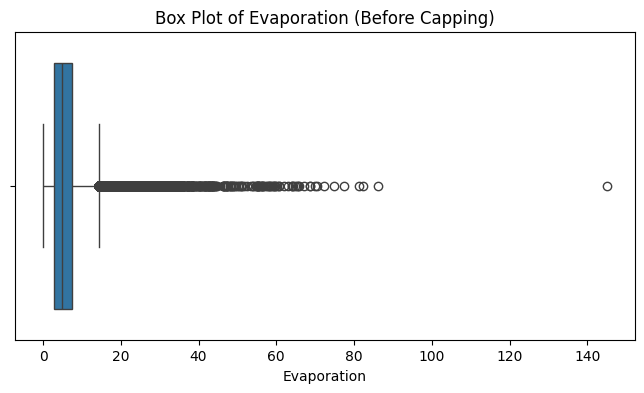

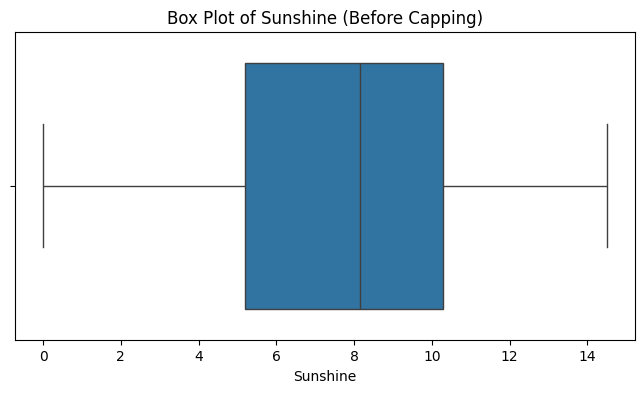

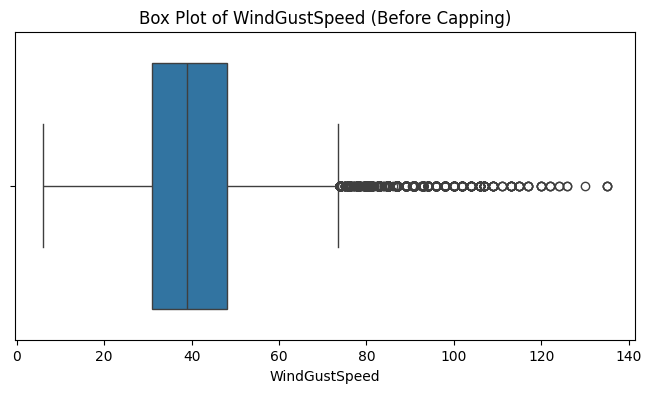

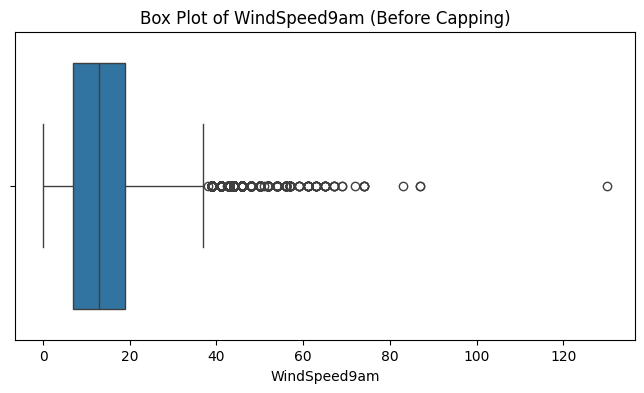

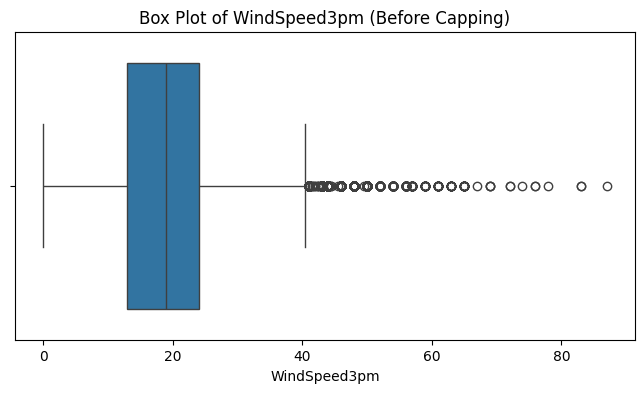

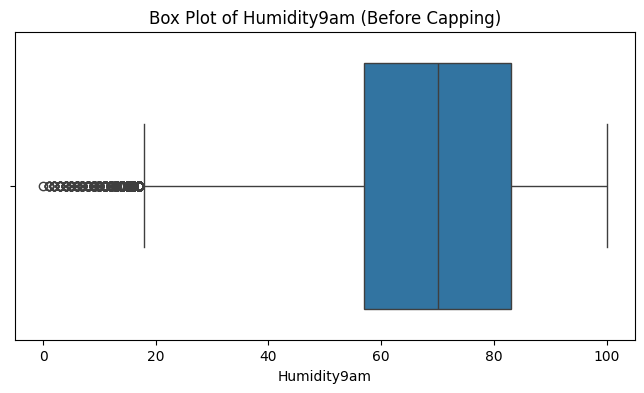

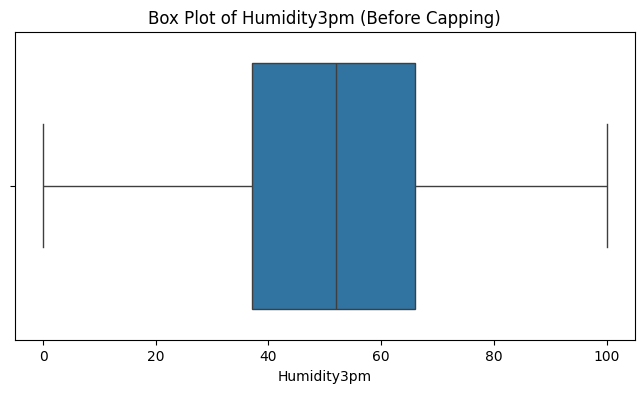

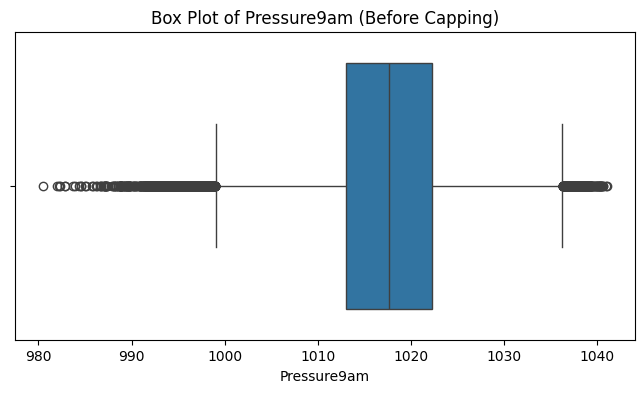

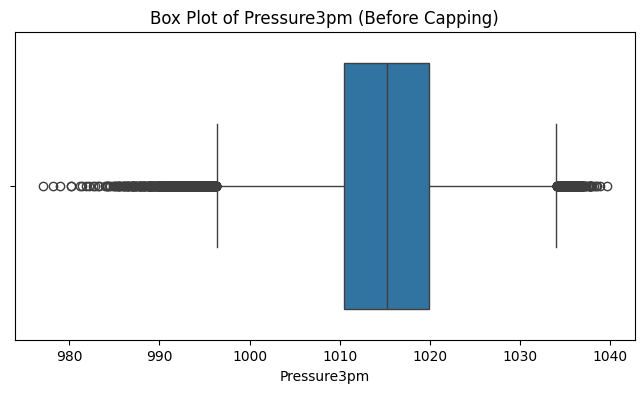

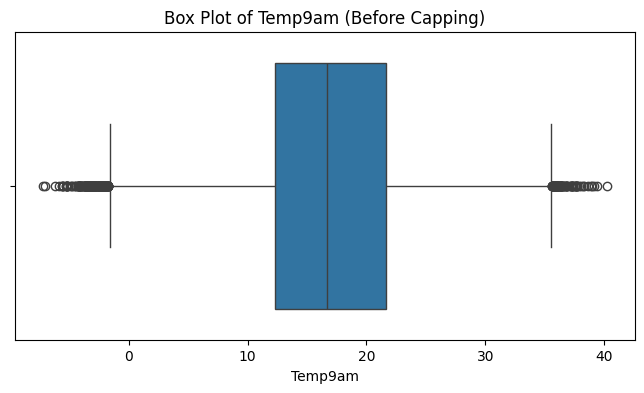

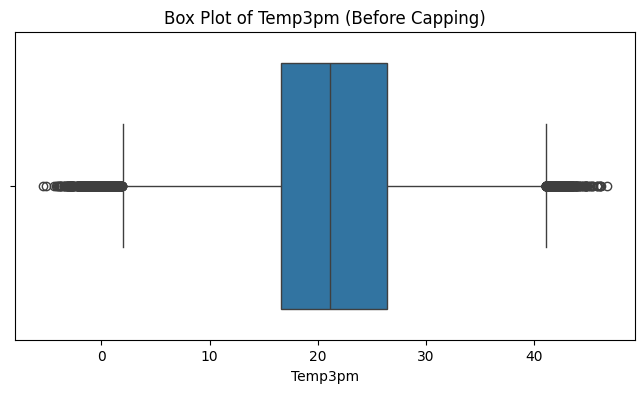

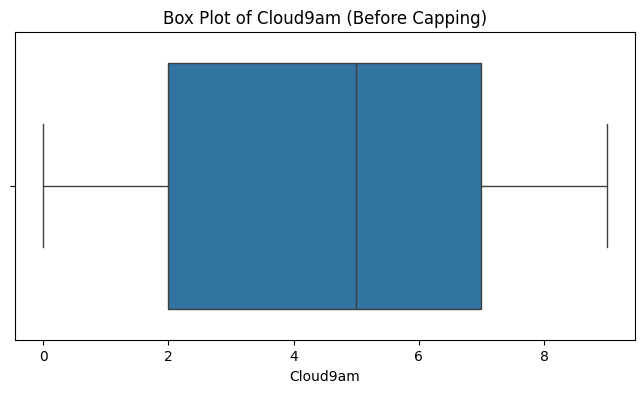

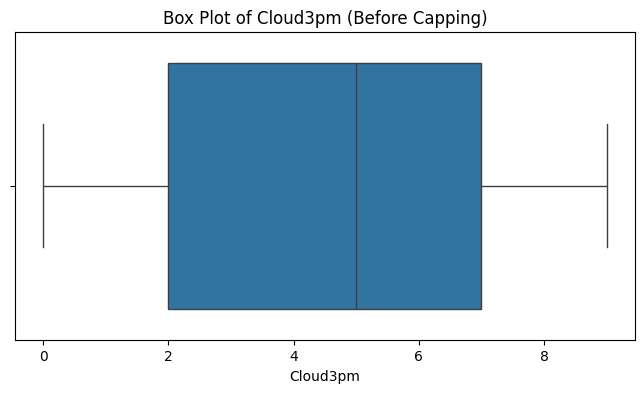

Outlier indices: [Timestamp('2015-02-27 00:00:00'), Timestamp('2009-11-06 00:00:00'), Timestamp('2009-06-25 00:00:00'), Timestamp('2010-10-09 00:00:00'), Timestamp('2011-12-26 00:00:00'), Timestamp('2008-09-19 00:00:00'), Timestamp('2015-04-22 00:00:00'), Timestamp('2010-09-06 00:00:00'), Timestamp('2012-03-17 00:00:00'), Timestamp('2010-02-21 00:00:00'), Timestamp('2016-09-03 00:00:00'), Timestamp('2012-10-12 00:00:00'), Timestamp('2009-02-22 00:00:00'), Timestamp('2009-11-10 00:00:00'), Timestamp('2012-02-08 00:00:00'), Timestamp('2017-01-26 00:00:00'), Timestamp('2016-04-13 00:00:00'), Timestamp('2008-07-29 00:00:00'), Timestamp('2011-01-11 00:00:00'), Timestamp('2010-03-23 00:00:00'), Timestamp('2009-04-19 00:00:00'), Timestamp('2013-07-11 00:00:00'), Timestamp('2011-05-13 00:00:00'), Timestamp('2010-07-31 00:00:00'), Timestamp('2011-03-14 00:00:00'), Timestamp('2015-05-14 00:00:00'), Timestamp('2010-09-17 00:00:00'), Timestamp('2011-01-02 00:00:00'), Timestamp('2015-07-09 00:00:00

In [21]:
numerical_cols_for_outliers = [col for col in numerical_cols if col not in ['PollinationRisk', 'DroughtShock', 'DiseaseRisk', 'StressDay']]
outliers = detect_outliers(climatic_data, numerical_cols_for_outliers)
print("Outlier indices:", outliers)

In [22]:
climatic_data

Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
Date                                                                    
2007-11-01          Canberra      8.0     24.3       0.0         3.40   
2007-11-02          Canberra     14.0     26.9       3.6         4.40   
2007-11-03          Canberra     13.7     23.4       3.6         5.80   
2007-11-04          Canberra     13.3     15.5      39.8         7.20   
2007-11-05          Canberra      7.6     16.1       2.8         5.60   
...                      ...      ...      ...       ...          ...   
2017-06-25              Sale      0.1     14.8       0.0         2.75   
2017-06-25  MelbourneAirport      5.5     13.9       0.0         2.80   
2017-06-25         Melbourne      8.6     14.3       0.0         2.80   
2017-06-25             Perth      6.3     17.0       0.0         1.60   
2017-06-25             Uluru     14.9     17.0       0.0         1.60   

            Sunshine  WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  \
Date                                                                      ...   
2007-11-01       6.3        315.0           30.0       225.0       315.0  ...   
2007-11-02       9.7         67.5           39.0        90.0       270.0  ...   
2007-11-03       3.3        315.0           85.0         0.0        22.5  ...   
2007-11-04       9.1        315.0           54.0       292.5       270.0  ...   
2007-11-05      10.6        157.5           50.0       157.5       112.5  ...   
...              ...          ...            ...         ...         ...  ...   
2017-06-25       4.2        135.0           29.5       292.5       315.0  ...   
2017-06-25       3.8        337.5           44.0         0.0       315.0  ...   
2017-06-25       3.8        315.0           35.0         0.0       337.5  ...   
2017-06-25       7.9         90.0           26.0       135.0       135.0  ...   
2017-06-25       7.9         90.0           26.0       112.5       112.5  ...   

            Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
Date                                                                       
2007-11-01       1015.0  7.000000  7.000000     14.4     23.6         No   
2007-11-02       1008.4  5.000000  3.000000     17.5     25.7        Yes   
2007-11-03       1007.2  8.000000  7.000000     15.4     20.2        Yes   
2007-11-04       1007.0  2.000000  7.000000     13.5     14.1        Yes   
2007-11-05       1018.5  7.000000  7.000000     11.1     15.4        Yes   
...                 ...       ...       ...      ...      ...        ...   
2017-06-25       1013.2  7.333333  7.333333      5.9     14.0         No   
2017-06-25       1015.5  7.000000  7.000000      8.1     12.2         No   
2017-06-25       1015.0  7.000000  7.000000      9.3     13.4         No   
2017-06-25       1026.0  1.000000  3.000000     11.5     15.6         No   
2017-06-25       1017.9  8.000000  8.000000     15.0     20.9         No   

            RainTomorrow  WindGustDir_cat  WindDir9am_cat  WindDir3pm_cat  
Date                                                                       
2007-11-01           Yes               NW              SW              NW  
2007-11-02           Yes              ENE               E               W  
2007-11-03           Yes               NW               N             NNE  
2007-11-04           Yes               NW             WNW               W  
2007-11-05            No              SSE             SSE             ESE  
...                  ...              ...             ...             ...  
2017-06-25            No               SE             WNW              NW  
2017-06-25            No              NNW               N              NW  
2017-06-25           Yes               NW               N             NNW  
2017-06-25            No                E              SE              SE  
2017-06-25            No                E             ESE             ESE  

[145460 rows x 25 columns]

In [23]:
# Cap outliers
def cap_outliers(df, columns):
    df_capped = df.copy()
    for col in columns:
        Q1 = df_capped[col].quantile(0.25)
        Q3 = df_capped[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_capped[col] = df_capped[col].clip(lower=lower_bound, upper=upper_bound)
        # Visualize after capping
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=df_capped[col])
        plt.title(f'Box Plot of {col} (After Capping)')
        plt.savefig(os.path.join(plot_dir, f'boxplot_after_{col}.png'))
        plt.show()
        plt.close()
    return df_capped

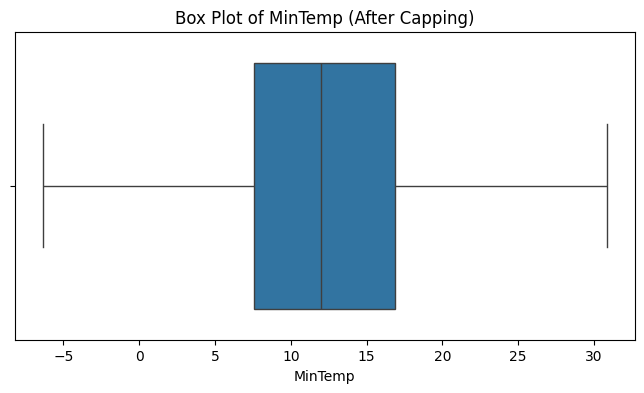

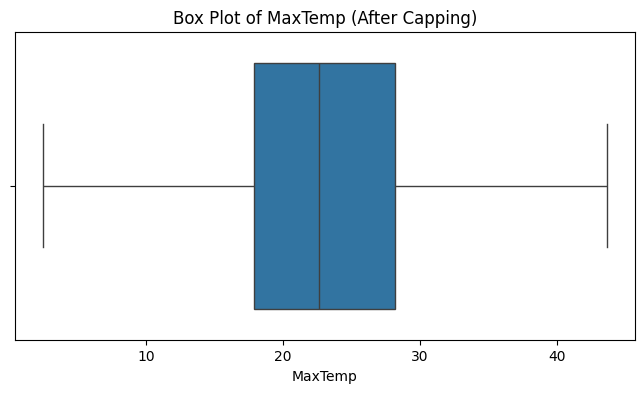

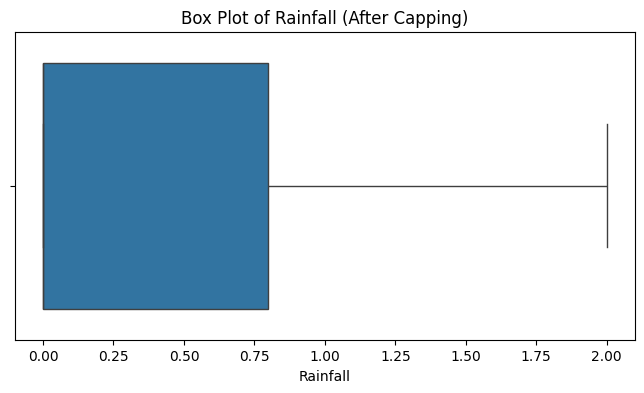

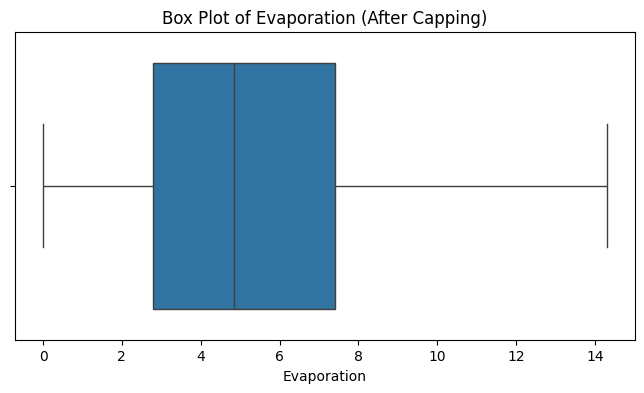

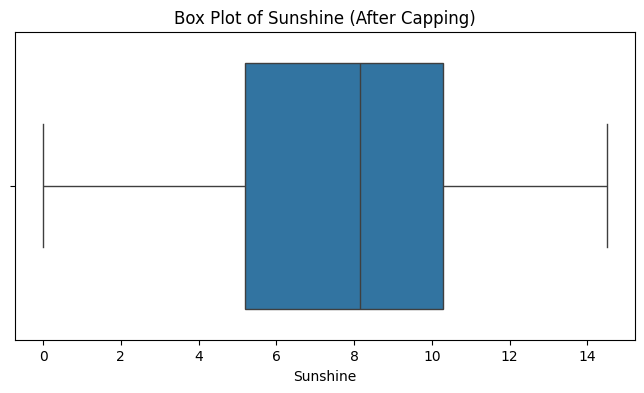

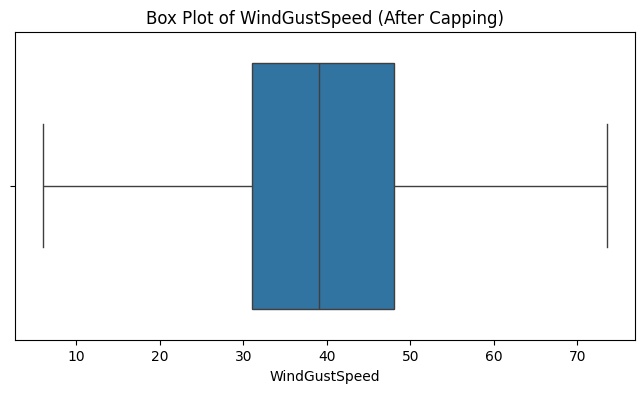

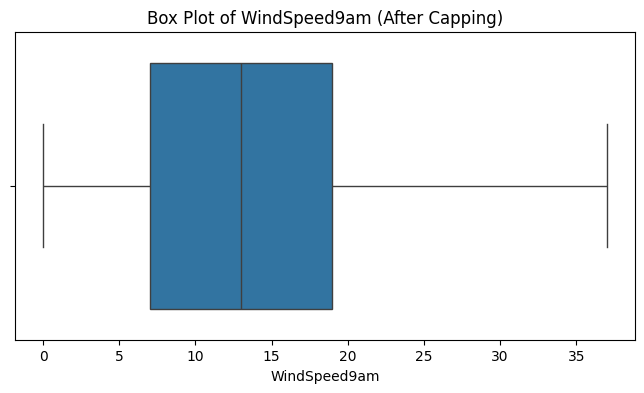

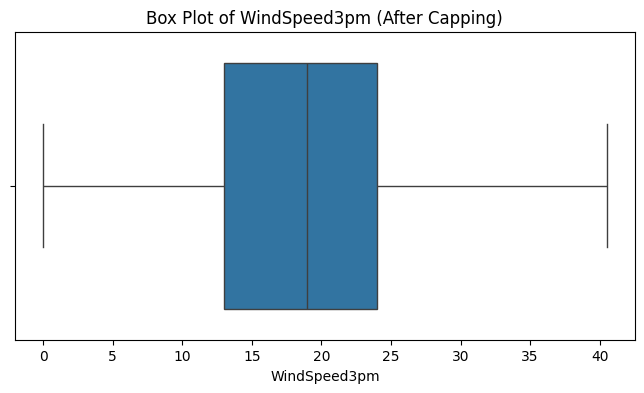

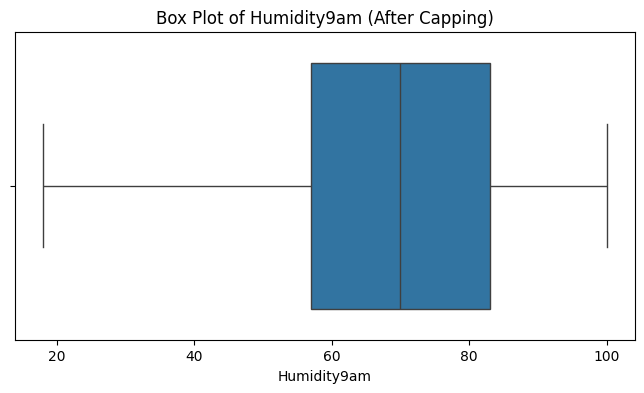

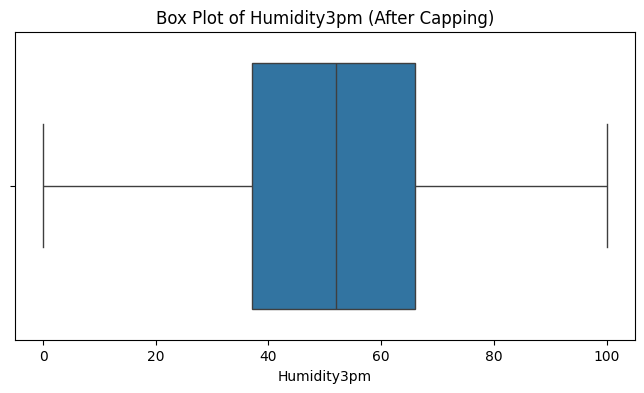

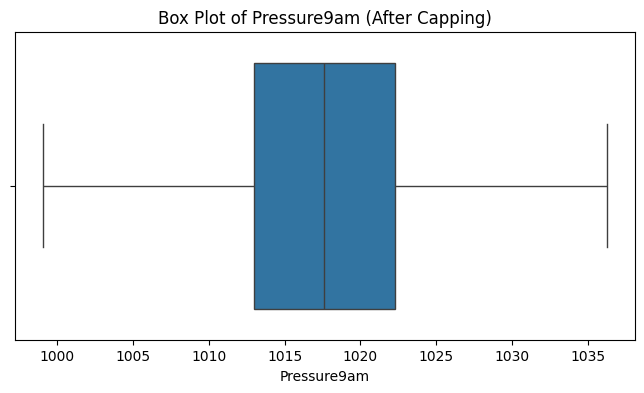

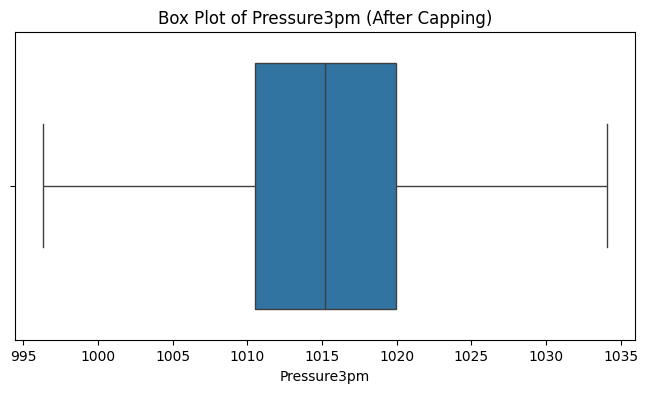

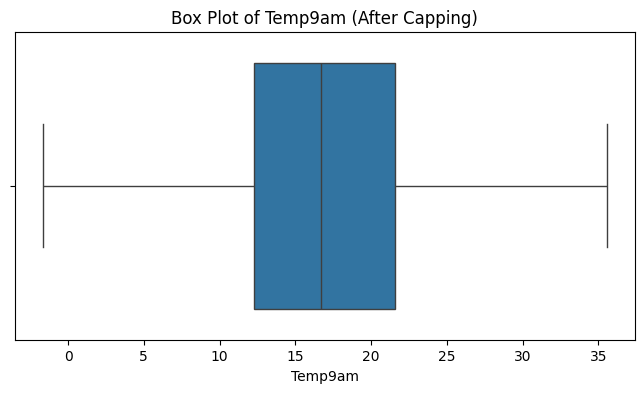

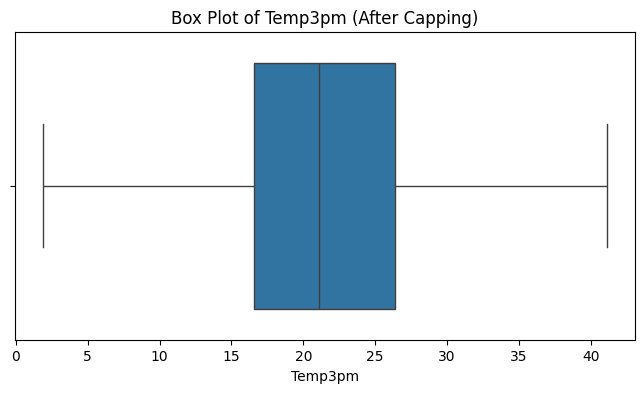

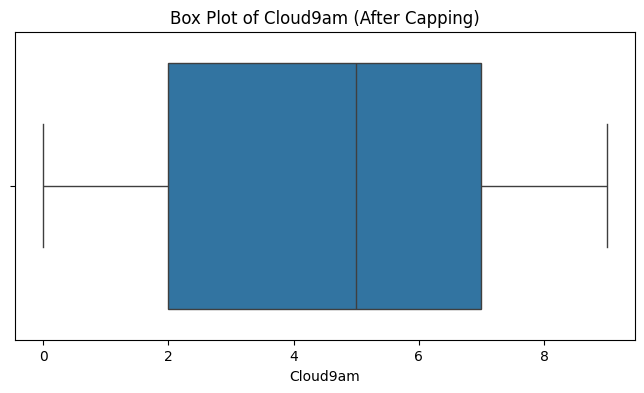

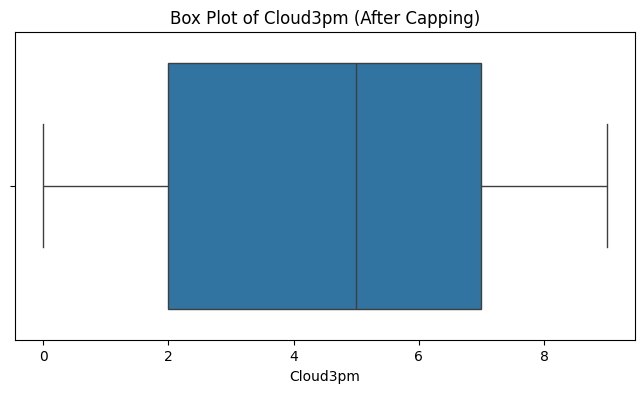

In [24]:
climatic_data = cap_outliers(climatic_data, numerical_cols_for_outliers)

In [25]:
climatic_data

Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
Date                                                                    
2007-11-01          Canberra      8.0     24.3       0.0         3.40   
2007-11-02          Canberra     14.0     26.9       2.0         4.40   
2007-11-03          Canberra     13.7     23.4       2.0         5.80   
2007-11-04          Canberra     13.3     15.5       2.0         7.20   
2007-11-05          Canberra      7.6     16.1       2.0         5.60   
...                      ...      ...      ...       ...          ...   
2017-06-25              Sale      0.1     14.8       0.0         2.75   
2017-06-25  MelbourneAirport      5.5     13.9       0.0         2.80   
2017-06-25         Melbourne      8.6     14.3       0.0         2.80   
2017-06-25             Perth      6.3     17.0       0.0         1.60   
2017-06-25             Uluru     14.9     17.0       0.0         1.60   

            Sunshine  WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  \
Date                                                                      ...   
2007-11-01       6.3        315.0           30.0       225.0       315.0  ...   
2007-11-02       9.7         67.5           39.0        90.0       270.0  ...   
2007-11-03       3.3        315.0           73.5         0.0        22.5  ...   
2007-11-04       9.1        315.0           54.0       292.5       270.0  ...   
2007-11-05      10.6        157.5           50.0       157.5       112.5  ...   
...              ...          ...            ...         ...         ...  ...   
2017-06-25       4.2        135.0           29.5       292.5       315.0  ...   
2017-06-25       3.8        337.5           44.0         0.0       315.0  ...   
2017-06-25       3.8        315.0           35.0         0.0       337.5  ...   
2017-06-25       7.9         90.0           26.0       135.0       135.0  ...   
2017-06-25       7.9         90.0           26.0       112.5       112.5  ...   

            Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
Date                                                                       
2007-11-01       1015.0  7.000000  7.000000     14.4     23.6         No   
2007-11-02       1008.4  5.000000  3.000000     17.5     25.7        Yes   
2007-11-03       1007.2  8.000000  7.000000     15.4     20.2        Yes   
2007-11-04       1007.0  2.000000  7.000000     13.5     14.1        Yes   
2007-11-05       1018.5  7.000000  7.000000     11.1     15.4        Yes   
...                 ...       ...       ...      ...      ...        ...   
2017-06-25       1013.2  7.333333  7.333333      5.9     14.0         No   
2017-06-25       1015.5  7.000000  7.000000      8.1     12.2         No   
2017-06-25       1015.0  7.000000  7.000000      9.3     13.4         No   
2017-06-25       1026.0  1.000000  3.000000     11.5     15.6         No   
2017-06-25       1017.9  8.000000  8.000000     15.0     20.9         No   

            RainTomorrow  WindGustDir_cat  WindDir9am_cat  WindDir3pm_cat  
Date                                                                       
2007-11-01           Yes               NW              SW              NW  
2007-11-02           Yes              ENE               E               W  
2007-11-03           Yes               NW               N             NNE  
2007-11-04           Yes               NW             WNW               W  
2007-11-05            No              SSE             SSE             ESE  
...                  ...              ...             ...             ...  
2017-06-25            No               SE             WNW              NW  
2017-06-25            No              NNW               N              NW  
2017-06-25           Yes               NW               N             NNW  
2017-06-25            No                E              SE              SE  
2017-06-25            No                E             ESE             ESE  

[145460 rows x 25 columns]

In [26]:
# Calculate stress parameters
#PollinationRisk
climatic_data['PollinationRisk'] = ((climatic_data['WindGustSpeed'] > 30) & (climatic_data['MaxTemp'] > 25)).astype(int)

In [27]:
#DroughtShock
climatic_data['DroughtShock'] = ((climatic_data['Evaporation'] > 8) & (climatic_data['Rainfall'] < 1) & ((climatic_data['Humidity9am'] + climatic_data['Humidity3pm']) / 2 < 30)).astype(int)

In [28]:
#DiseaseRisk
climatic_data['DiseaseRisk'] = ((climatic_data['MaxTemp'] > 30) & ((climatic_data['Humidity9am'] + climatic_data['Humidity3pm']) / 2 > 70)).astype(int)

In [29]:
#WindDirectionShift
climatic_data['WindDirectionShift'] = climatic_data.apply(lambda x: min(abs(x['WindGustDir'] - x['WindDir9am']), abs(x['WindGustDir'] - x['WindDir3pm'])), axis=1)

In [30]:
#WindDamageIndex
climatic_data['WindDamageIndex'] = climatic_data['WindGustSpeed'] * climatic_data['WindDirectionShift']

In [31]:
#ThermalShock
climatic_data['ThermalShock'] = climatic_data['MaxTemp'] - climatic_data['Temp3pm']

In [32]:
climatic_data['StressDay'] = (climatic_data[['PollinationRisk', 'DroughtShock', 'DiseaseRisk']].sum(axis=1) > 0).astype(int)

In [33]:
climatic_data[(climatic_data['PollinationRisk'] == 1) |
              (climatic_data['DroughtShock'] == 1) |
              (climatic_data['DiseaseRisk'] == 1)]

Location  MinTemp  MaxTemp  Rainfall  Evaporation   Sunshine  \
Date                                                                         
2007-11-02    Canberra     14.0    26.90       2.0         4.40   9.700000   
2007-11-12    Canberra      8.5    27.30       0.2         7.20  12.500000   
2007-11-14    Canberra     12.1    30.90       0.0         6.20  12.400000   
2007-11-15    Canberra     10.1    31.20       0.0         8.80  13.100000   
2007-11-16    Canberra     12.4    32.10       0.0         8.40  11.100000   
...                ...      ...      ...       ...          ...        ...   
2017-06-24      Cairns     19.3    25.60       1.2         3.10   7.150000   
2017-06-24  Townsville     14.3    25.60       0.0         4.40   9.766667   
2017-06-25    Adelaide      8.0    25.75       0.0         2.32   9.325000   
2017-06-25      Cairns     19.1    27.30       2.0         2.44   8.850000   
2017-06-25  Townsville     16.5    25.80       0.0         2.56   8.375000   

            WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  \
Date                                                            ...   
2007-11-02         67.5           39.0        90.0       270.0  ...   
2007-11-12         90.0           41.0        90.0       315.0  ...   
2007-11-14        315.0           44.0       292.5       270.0  ...   
2007-11-15        315.0           41.0       180.0       270.0  ...   
2007-11-16         90.0           46.0       135.0       247.5  ...   
...                 ...            ...         ...         ...  ...   
2017-06-24         90.0           41.0       180.0       180.0  ...   
2017-06-24        112.5           37.0       135.0       112.5  ...   
2017-06-25         67.5           30.5        45.0       247.5  ...   
2017-06-25        135.0           41.0       157.5       112.5  ...   
2017-06-25        112.5           31.0       135.0        67.5  ...   

            WindGustDir_cat  WindDir9am_cat  WindDir3pm_cat  PollinationRisk  \
Date                                                                           
2007-11-02              ENE               E               W                1   
2007-11-12                E               E              NW                1   
2007-11-14               NW             WNW               W                1   
2007-11-15               NW               S               W                1   
2007-11-16                E              SE             WSW                1   
...                     ...             ...             ...              ...   
2017-06-24                E               S               S                1   
2017-06-24              ESE              SE             ESE                1   
2017-06-25              ENE              NE             WSW                1   
2017-06-25               SE             SSE             ESE                1   
2017-06-25              ESE              SE             ENE                1   

            DroughtShock  DiseaseRisk  WindDirectionShift  WindDamageIndex  \
Date                                                                         
2007-11-02             0            0                22.5           877.50   
2007-11-12             0            0                 0.0             0.00   
2007-11-14             0            0                22.5           990.00   
2007-11-15             0            0                45.0          1845.00   
2007-11-16             0            0                45.0          2070.00   
...                  ...          ...                 ...              ...   
2017-06-24             0            0                90.0          3690.00   
2017-06-24             0            0                 0.0             0.00   
2017-06-25             0            0                22.5           686.25   
2017-06-25             0            0                22.5           922.50   
2017-06-25             0            0                22.5           697.50   

            Thermal

In [34]:
climatic_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145460 entries, 2007-11-01 to 2017-06-25
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Location            145460 non-null  object 
 1   MinTemp             145460 non-null  float64
 2   MaxTemp             145460 non-null  float64
 3   Rainfall            145460 non-null  float64
 4   Evaporation         145460 non-null  float64
 5   Sunshine            145460 non-null  float64
 6   WindGustDir         145460 non-null  float64
 7   WindGustSpeed       145460 non-null  float64
 8   WindDir9am          145460 non-null  float64
 9   WindDir3pm          145460 non-null  float64
 10  WindSpeed9am        145460 non-null  float64
 11  WindSpeed3pm        145460 non-null  float64
 12  Humidity9am         145460 non-null  float64
 13  Humidity3pm         145460 non-null  float64
 14  Pressure9am         145460 non-null  float64
 15  Pressure3pm       

Summary statistics for MinTemp:
count    145460.000000
mean         12.198998
std           6.388982
min          -6.350000
25%           7.600000
50%          12.000000
75%          16.900000
max          30.850000
Name: MinTemp, dtype: float64


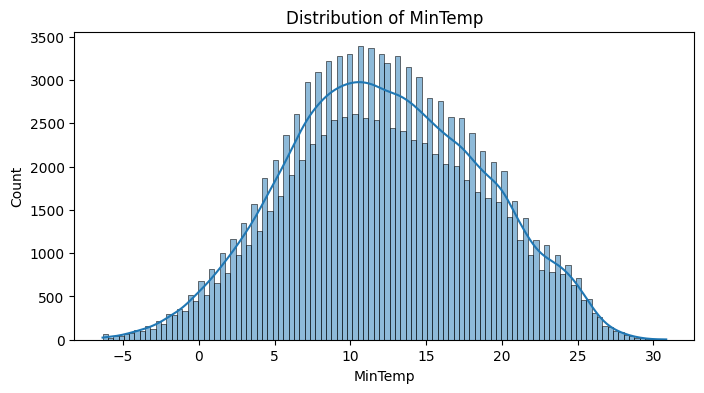

Summary statistics for MaxTemp:
count    145460.000000
mean         23.231215
std           7.094633
min           2.450000
25%          17.900000
50%          22.600000
75%          28.200000
max          43.650000
Name: MaxTemp, dtype: float64


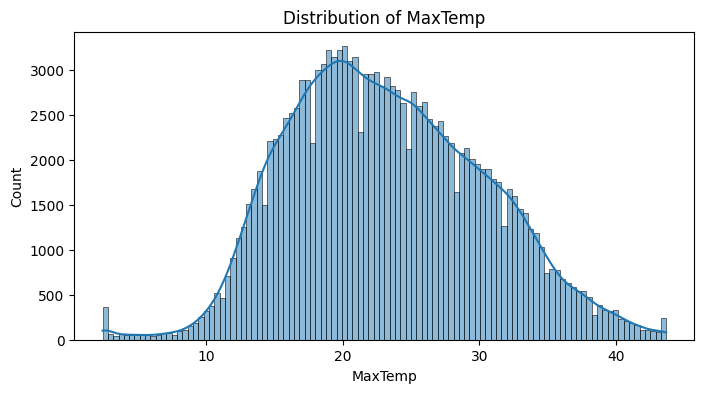

Summary statistics for Rainfall:
count    145460.000000
mean          0.492289
std           0.795000
min           0.000000
25%           0.000000
50%           0.000000
75%           0.800000
max           2.000000
Name: Rainfall, dtype: float64


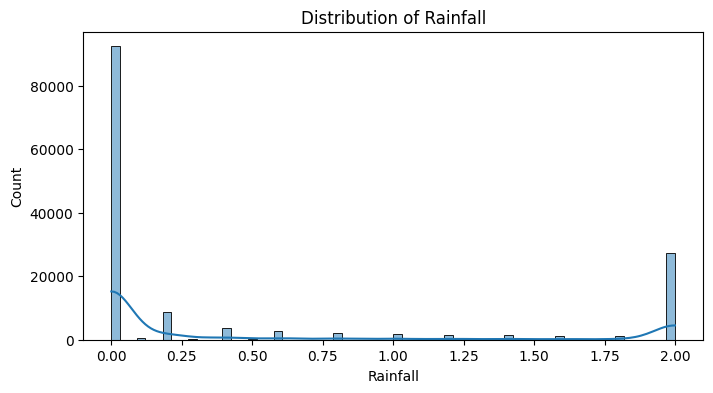

Summary statistics for Evaporation:
count    145460.000000
mean          5.395562
std           3.276261
min           0.000000
25%           2.800000
50%           4.850000
75%           7.400000
max          14.300000
Name: Evaporation, dtype: float64


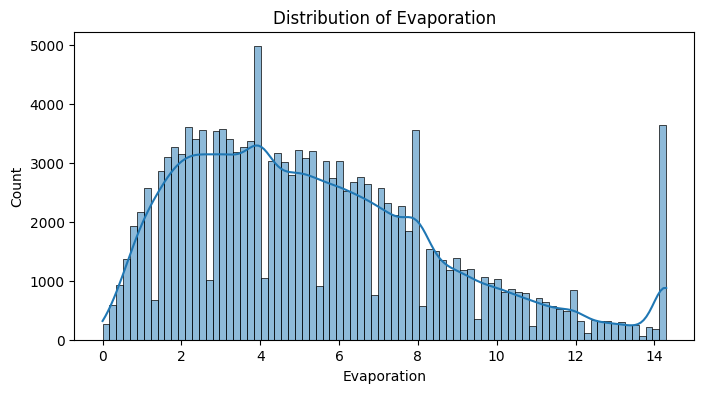

Summary statistics for Sunshine:
count    145460.000000
mean          7.606579
std           3.451166
min           0.000000
25%           5.200000
50%           8.166667
75%          10.300000
max          14.500000
Name: Sunshine, dtype: float64


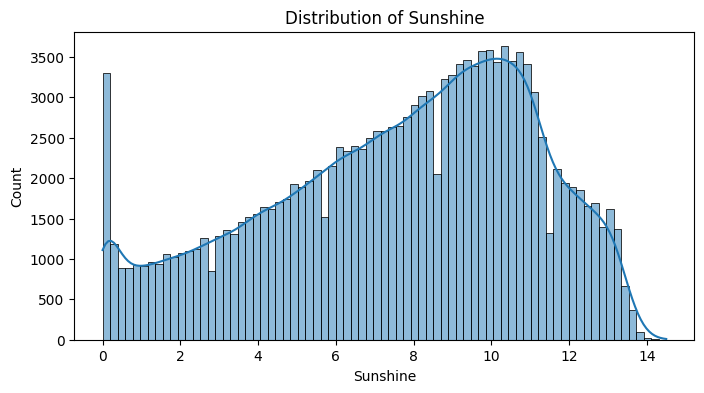

Summary statistics for WindGustSpeed:
count    145460.000000
mean         39.858354
std          12.821649
min           6.000000
25%          31.000000
50%          39.000000
75%          48.000000
max          73.500000
Name: WindGustSpeed, dtype: float64


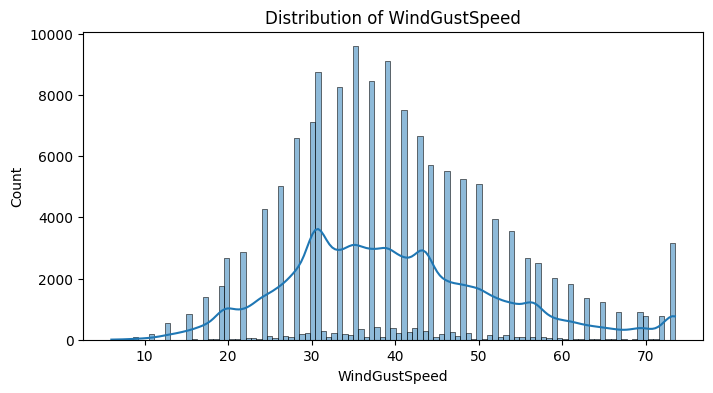

Summary statistics for WindSpeed9am:
count    145460.000000
mean         13.959876
std           8.587018
min           0.000000
25%           7.000000
50%          13.000000
75%          19.000000
max          37.000000
Name: WindSpeed9am, dtype: float64


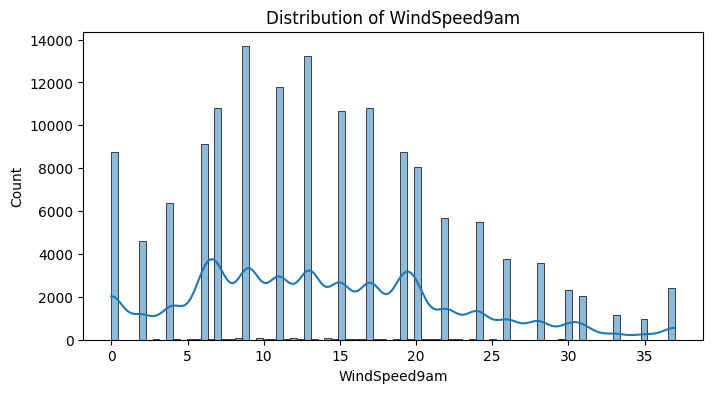

Summary statistics for WindSpeed3pm:
count    145460.000000
mean         18.578625
std           8.494391
min           0.000000
25%          13.000000
50%          19.000000
75%          24.000000
max          40.500000
Name: WindSpeed3pm, dtype: float64


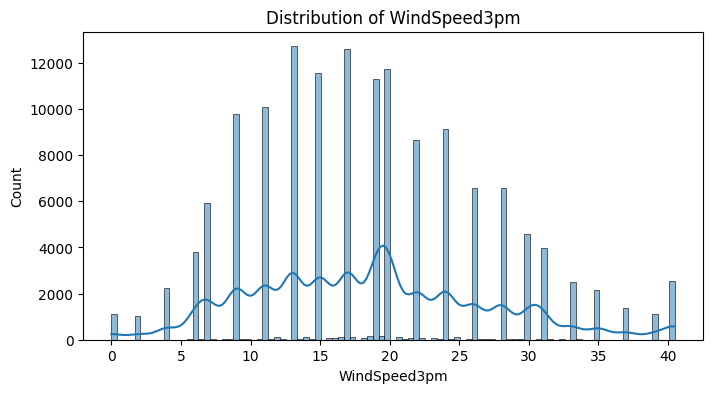

Summary statistics for Humidity9am:
count    145460.000000
mean         68.944150
std          18.807852
min          18.000000
25%          57.000000
50%          70.000000
75%          83.000000
max         100.000000
Name: Humidity9am, dtype: float64


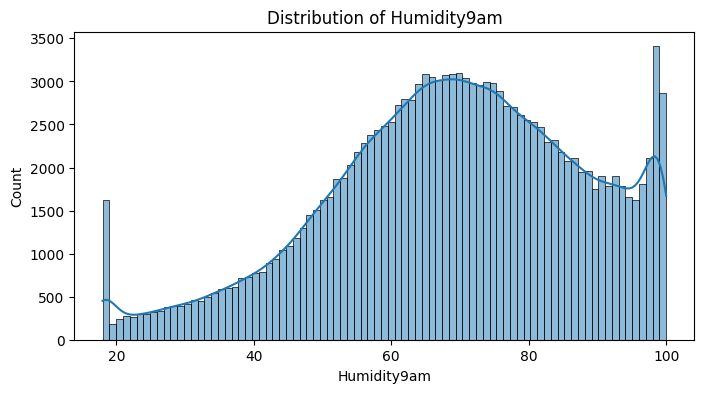

Summary statistics for Humidity3pm:
count    145460.000000
mean         51.541462
std          20.663639
min           0.000000
25%          37.000000
50%          52.000000
75%          66.000000
max         100.000000
Name: Humidity3pm, dtype: float64


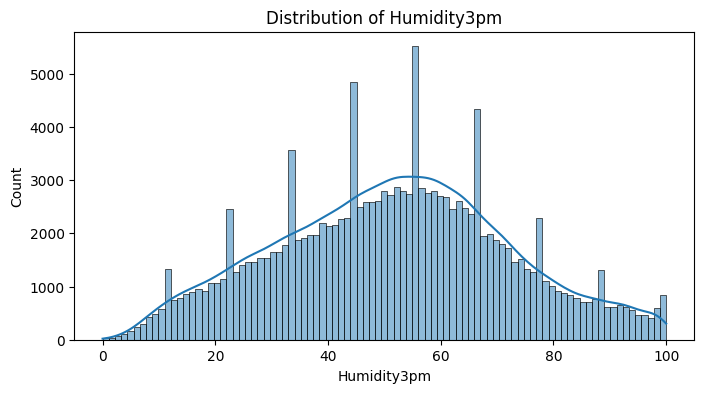

Summary statistics for Pressure9am:
count    145460.000000
mean       1017.671187
std           6.937490
min         999.050000
25%        1013.000000
50%        1017.600000
75%        1022.300000
max        1036.250000
Name: Pressure9am, dtype: float64


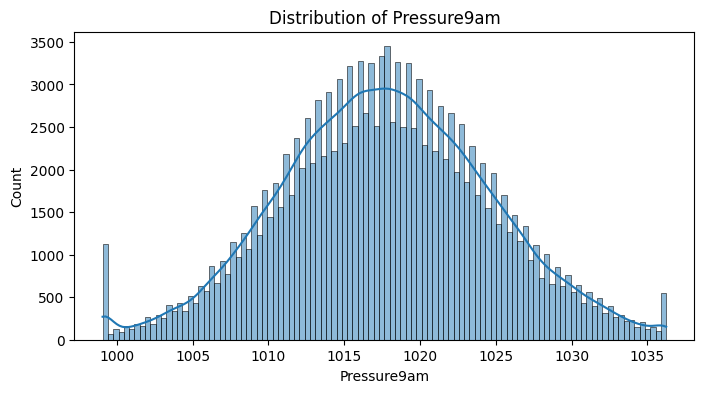

Summary statistics for Pressure3pm:
count    145460.000000
mean       1015.270138
std           6.892178
min         996.350000
25%        1010.500000
50%        1015.200000
75%        1019.933333
max        1034.083333
Name: Pressure3pm, dtype: float64


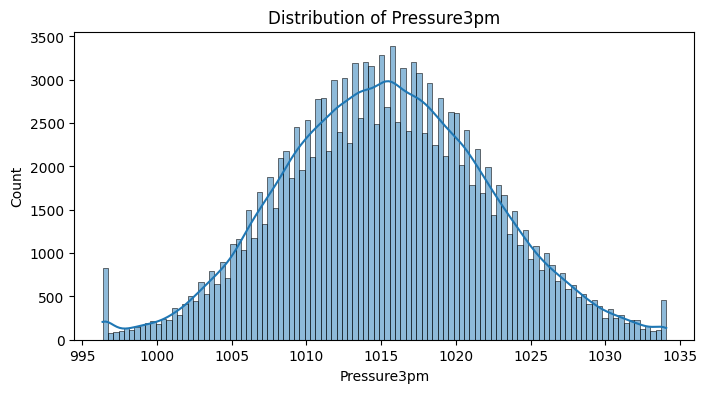

Summary statistics for Temp9am:
count    145460.000000
mean         16.997667
std           6.470539
min          -1.650000
25%          12.300000
50%          16.700000
75%          21.600000
max          35.550000
Name: Temp9am, dtype: float64


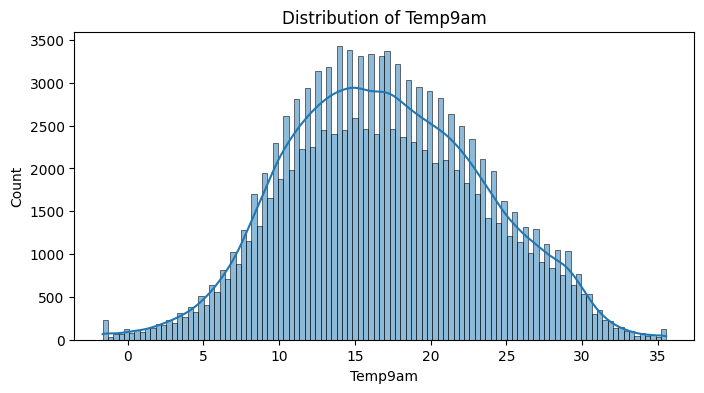

Summary statistics for Temp3pm:
count    145460.000000
mean         21.698939
std           6.890018
min           1.900000
25%          16.600000
50%          21.100000
75%          26.400000
max          41.100000
Name: Temp3pm, dtype: float64


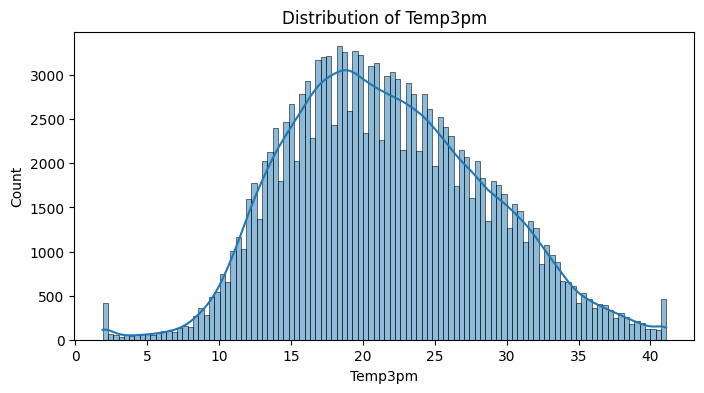

Summary statistics for Cloud9am:
count    145460.000000
mean          4.435285
std           2.648383
min           0.000000
25%           2.000000
50%           5.000000
75%           7.000000
max           9.000000
Name: Cloud9am, dtype: float64


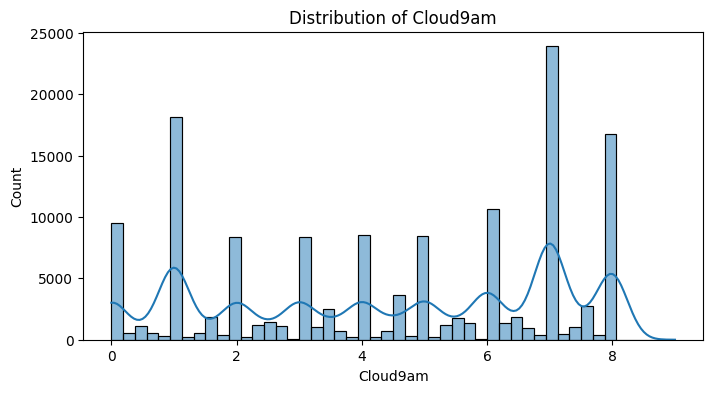

Summary statistics for Cloud3pm:
count    145460.000000
mean          4.485013
std           2.486078
min           0.000000
25%           2.000000
50%           5.000000
75%           7.000000
max           9.000000
Name: Cloud3pm, dtype: float64


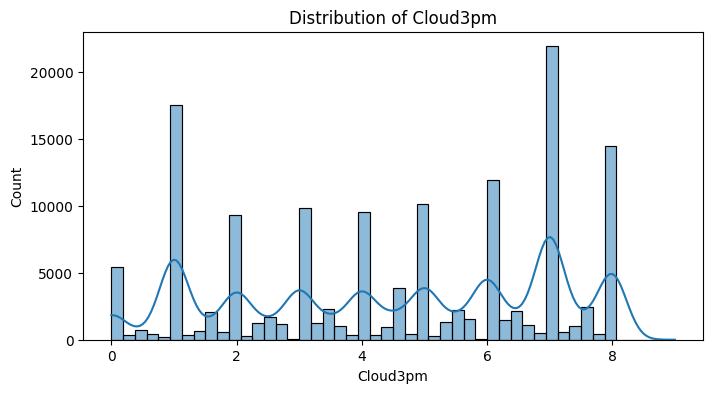

In [35]:
 # Univariate analysis
for col in numerical_cols:
    print(f"Summary statistics for {col}:")
    print(climatic_data[col].describe())
    plt.figure(figsize=(8, 4))
    sns.histplot(climatic_data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.savefig(os.path.join(plot_dir, f'univariate_{col}.png'))
    plt.show()
    plt.close()

Frequency table for RainToday:
RainToday
No     0.775512
Yes    0.224488
Name: proportion, dtype: float64


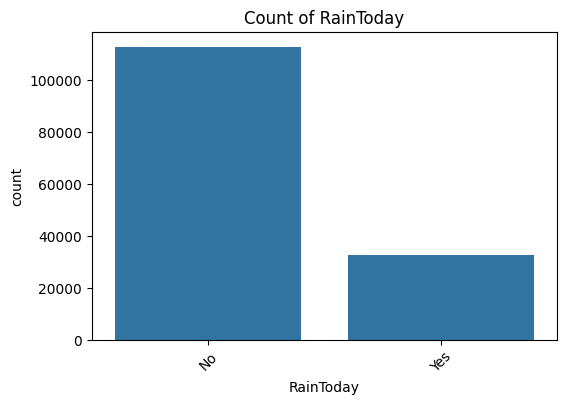

Frequency table for RainTomorrow:
RainTomorrow
No     0.775801
Yes    0.224199
Name: proportion, dtype: float64


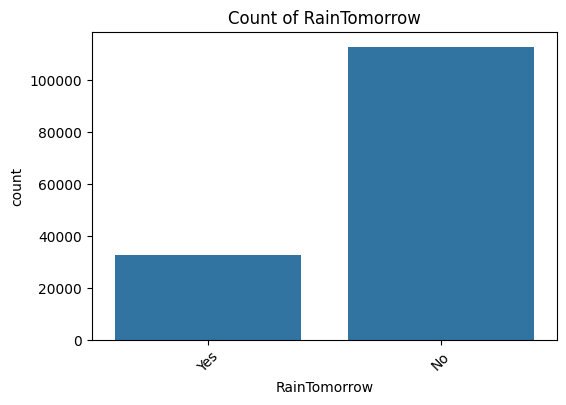

Frequency table for WindGustDir_cat:
WindGustDir_cat
W      0.073484
SE     0.069297
N      0.069057
E      0.068067
SSE    0.067943
S      0.067916
WSW    0.067111
SW     0.066403
SSW    0.064664
WNW    0.061233
ENE    0.059927
NW     0.059762
ESE    0.054558
NE     0.053039
NNW    0.048928
NNE    0.048611
Name: proportion, dtype: float64


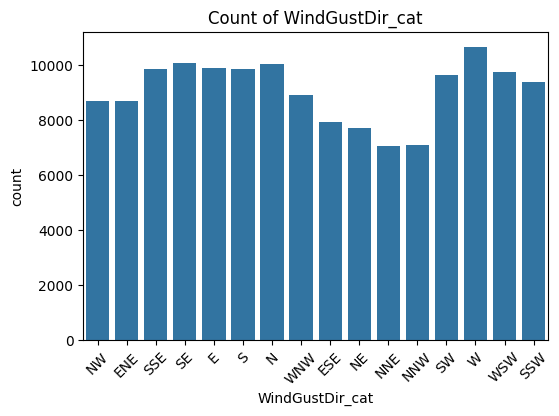

In [36]:
for col in ['RainToday', 'RainTomorrow', 'WindGustDir_cat']:
    print(f"Frequency table for {col}:")
    print(climatic_data[col].value_counts(normalize=True))
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=climatic_data)
    plt.title(f"Count of {col}")
    plt.xticks(rotation=45)
    plt.savefig(os.path.join(plot_dir, f'univariate_{col}.png'))
    plt.show()
    plt.close()

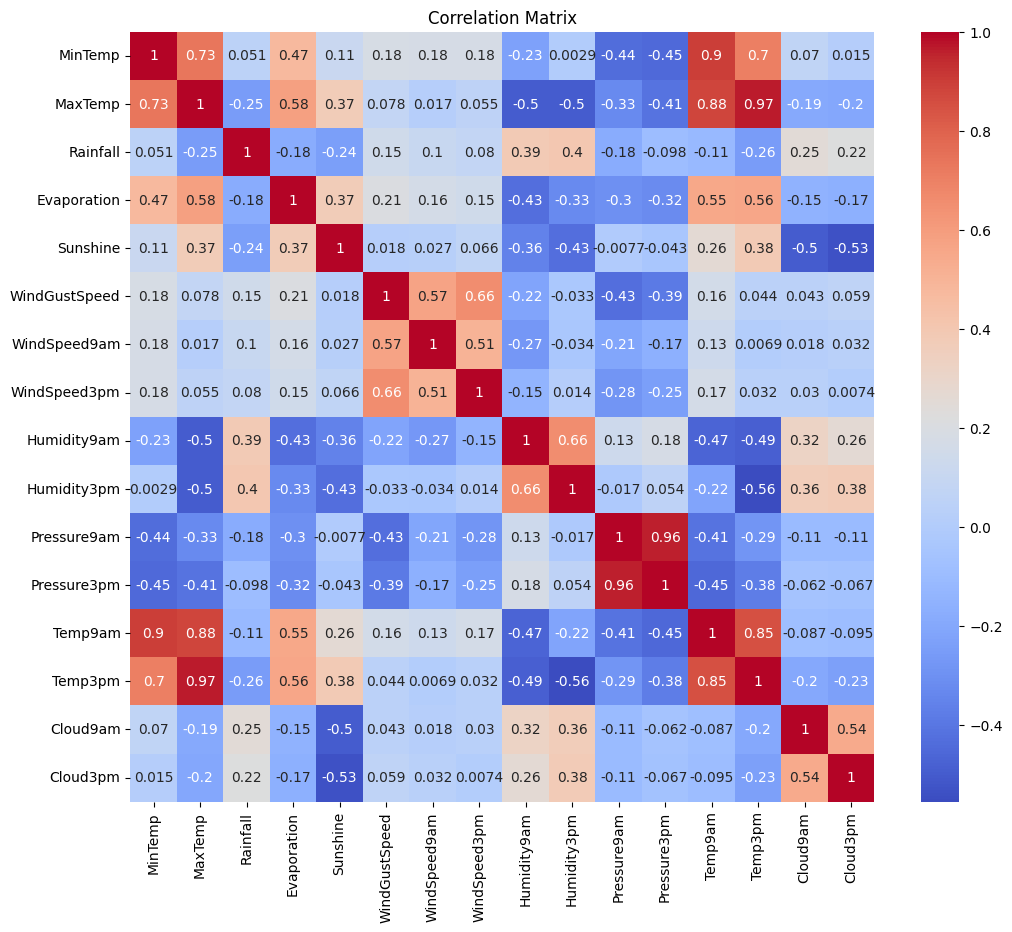

In [37]:
# Bivariate analysis
corr = climatic_data[numerical_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig(os.path.join(plot_dir, 'correlation_matrix.png'))
plt.show()
plt.close()

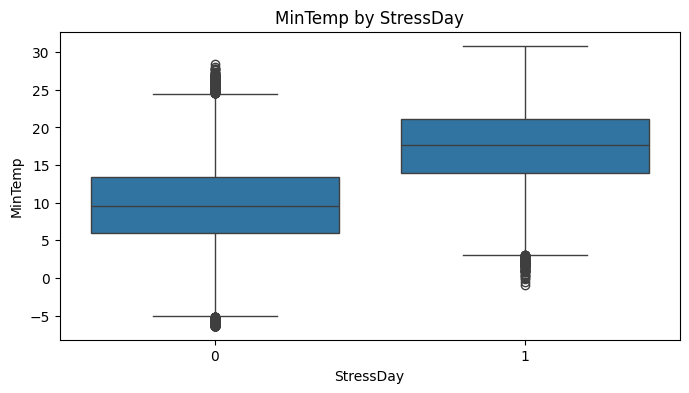

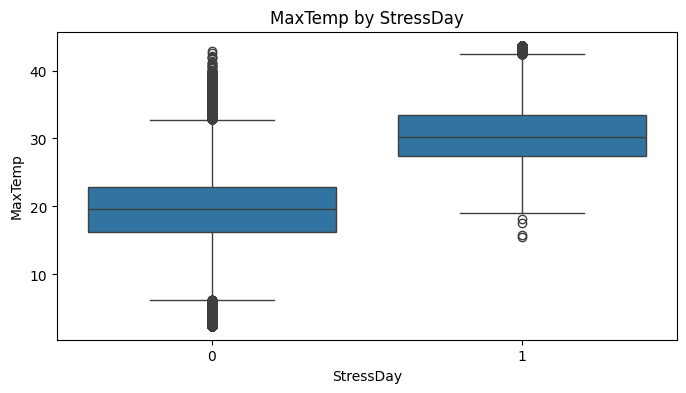

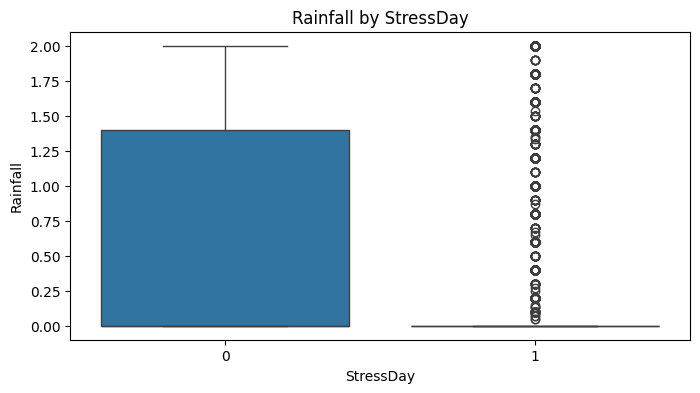

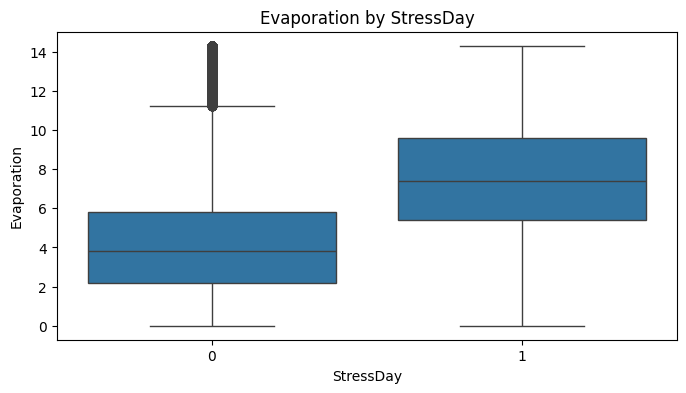

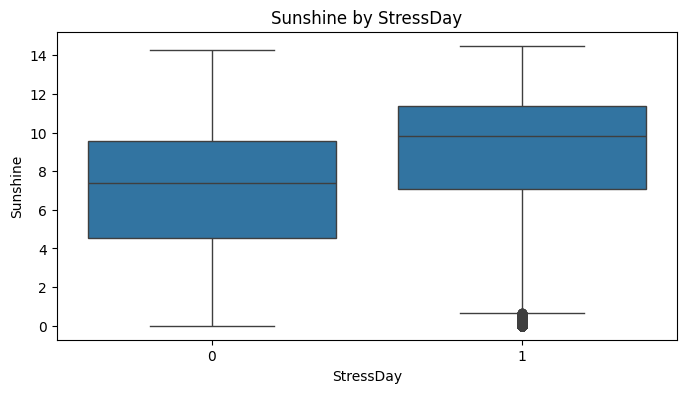

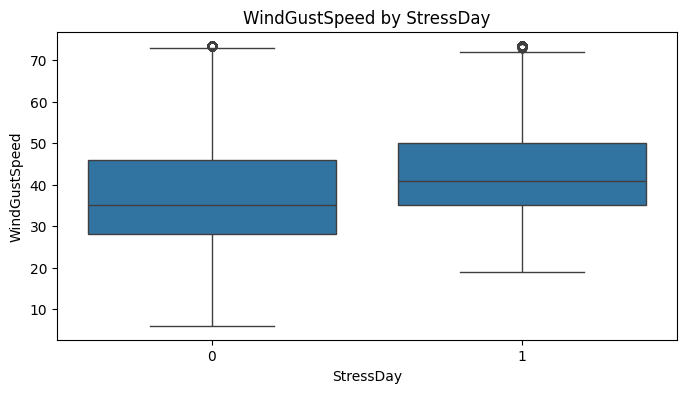

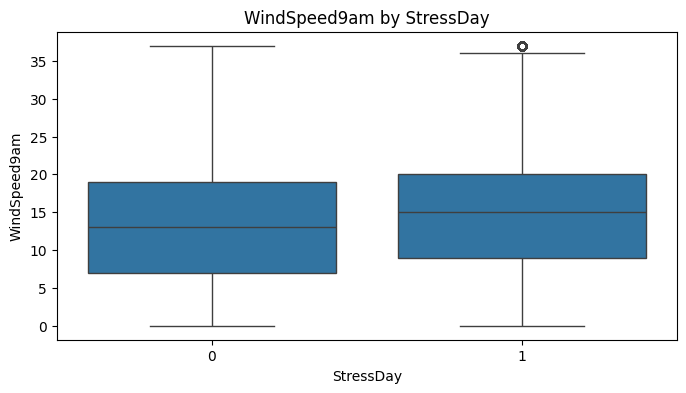

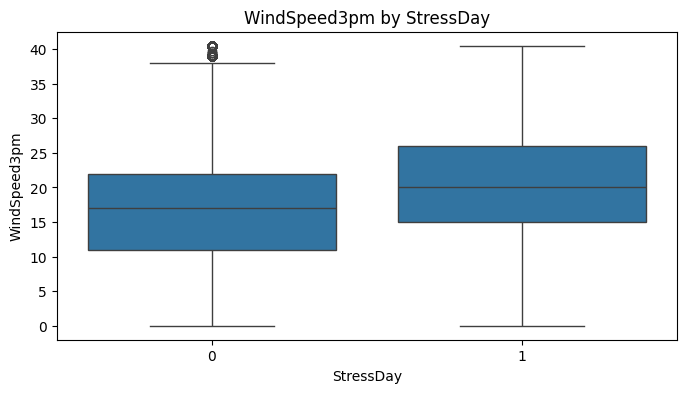

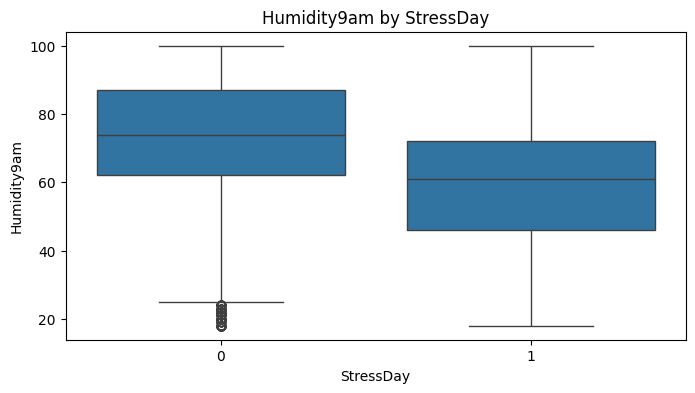

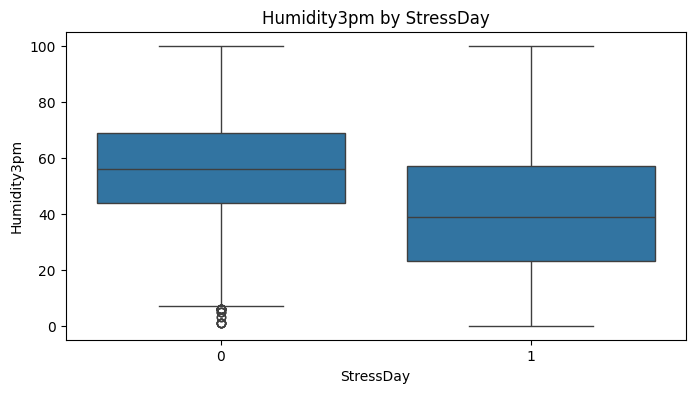

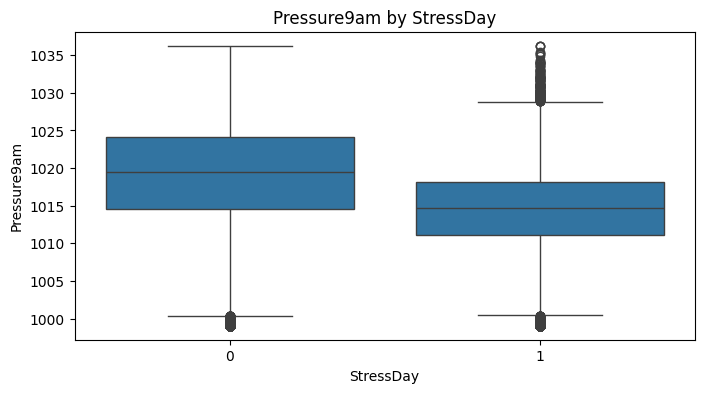

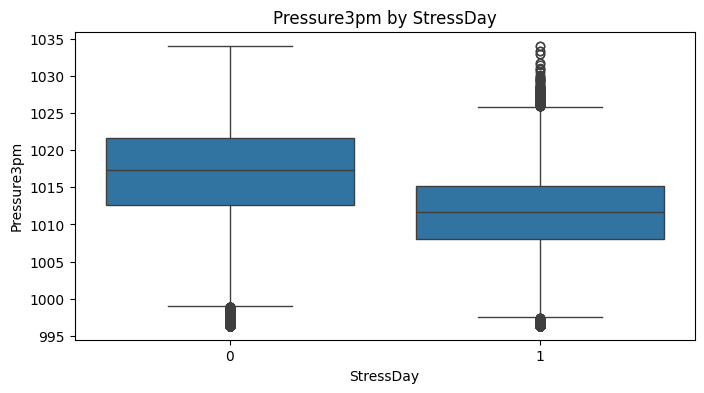

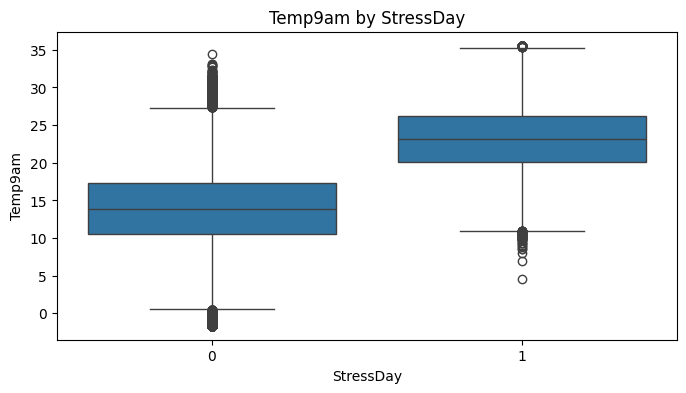

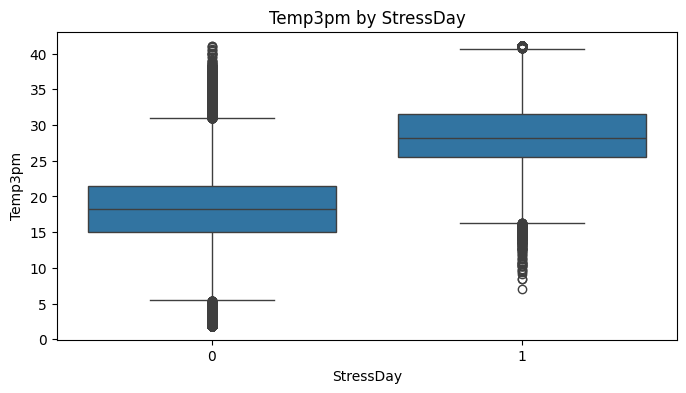

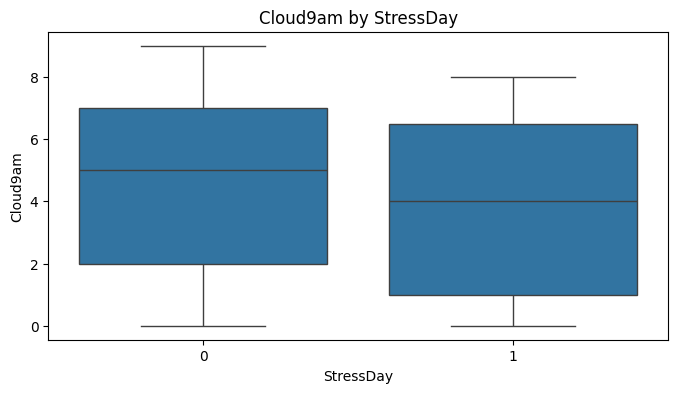

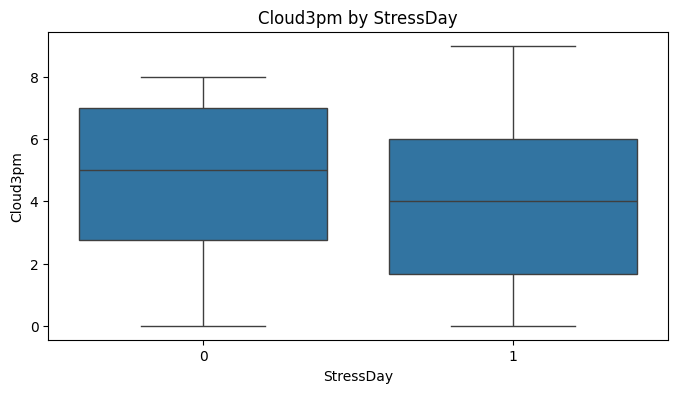

In [38]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='StressDay', y=col, data=climatic_data)
    plt.title(f'{col} by StressDay')
    plt.savefig(os.path.join(plot_dir, f'bivariate_{col}_StressDay.png'))
    plt.show()
    plt.close()

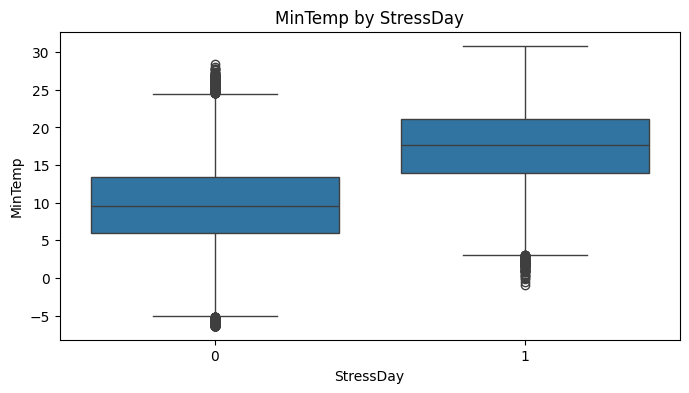

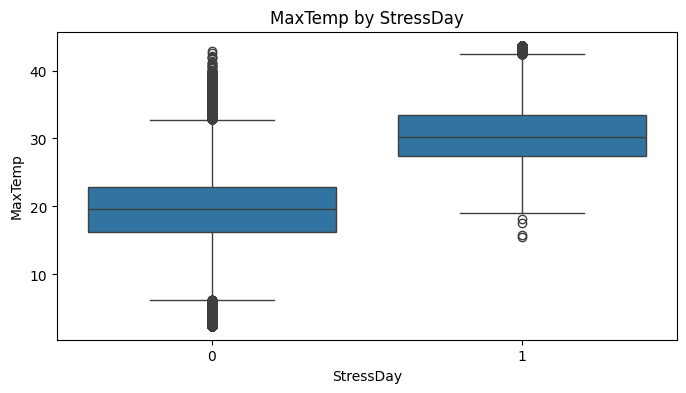

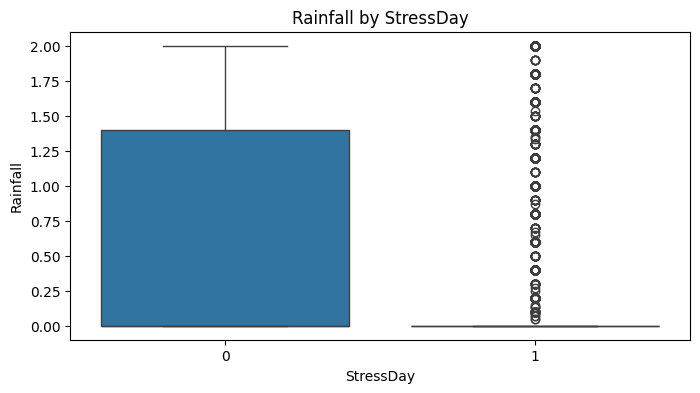

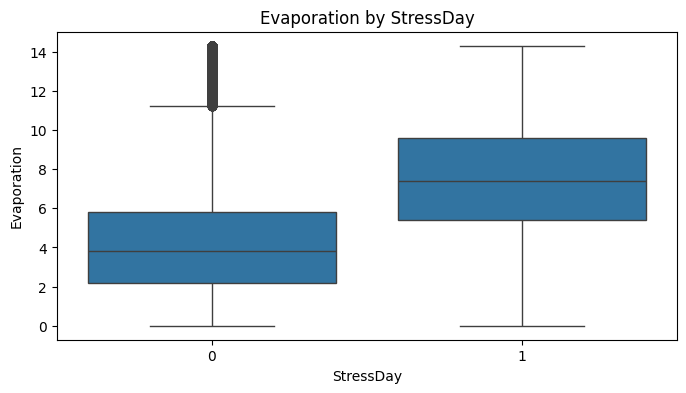

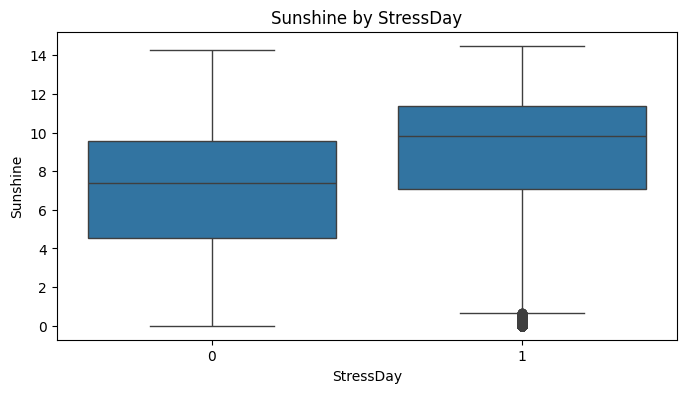

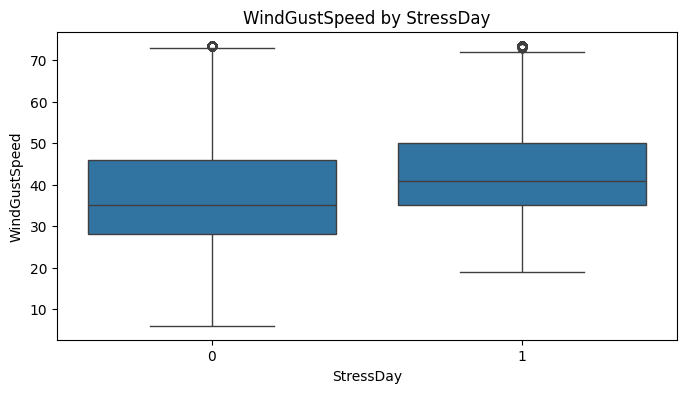

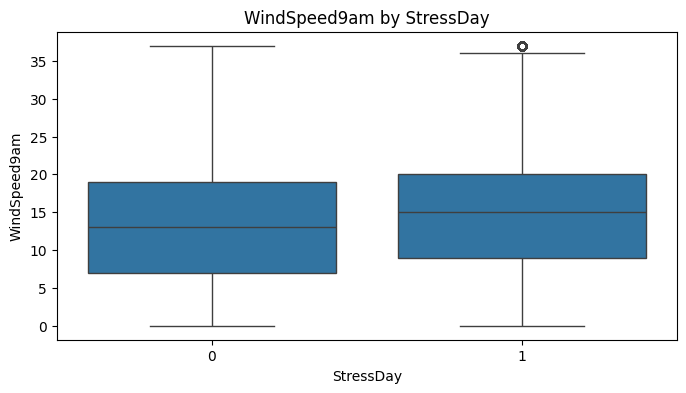

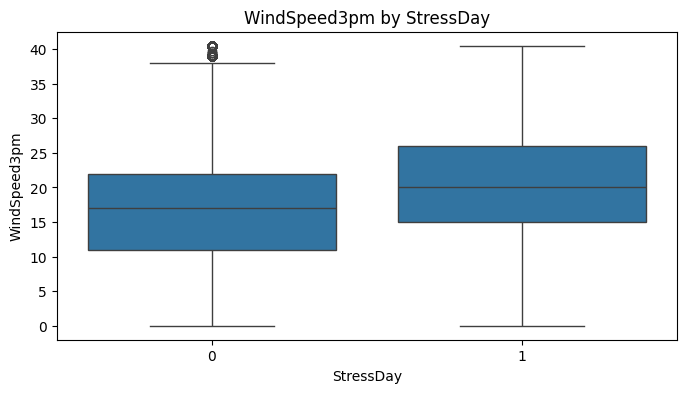

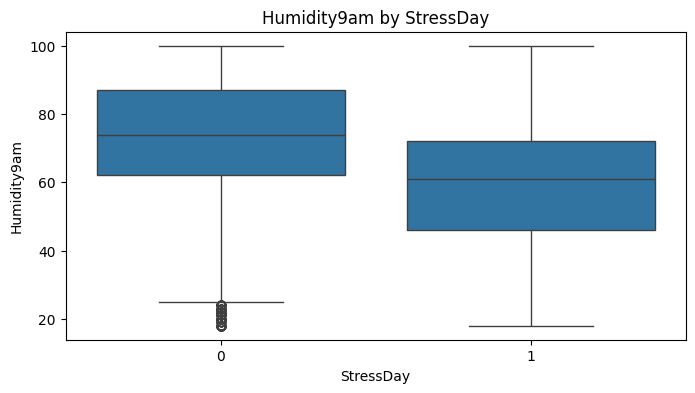

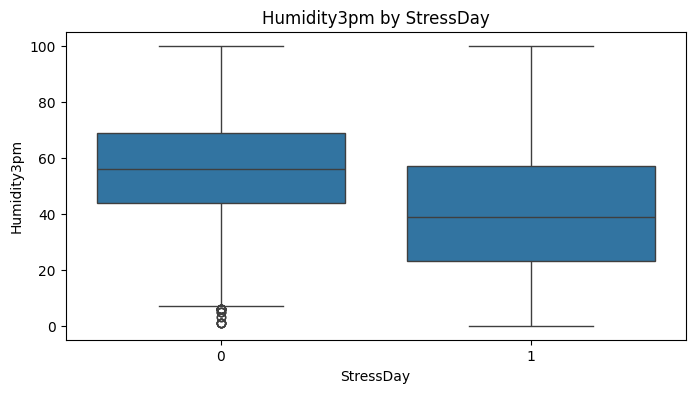

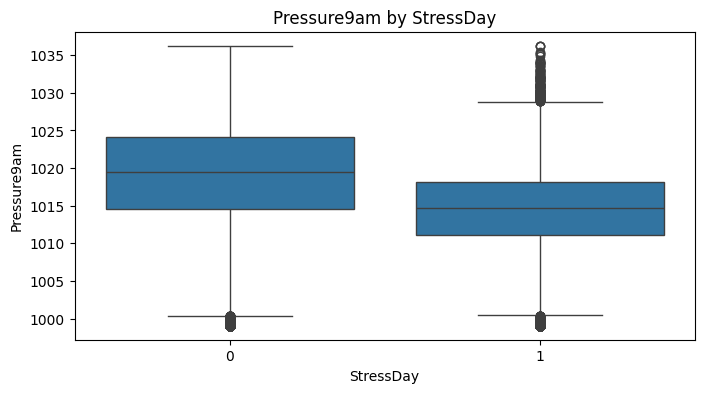

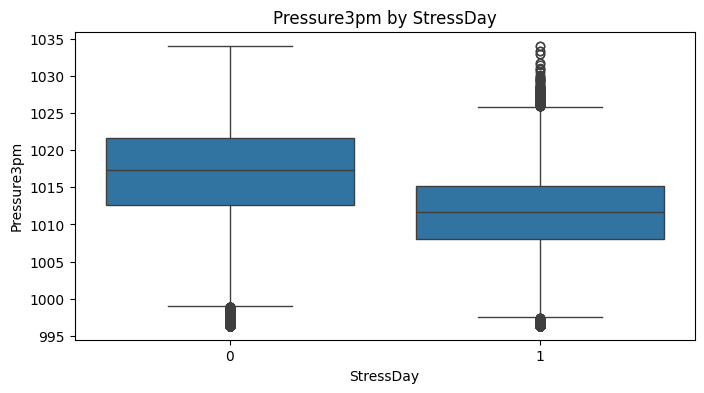

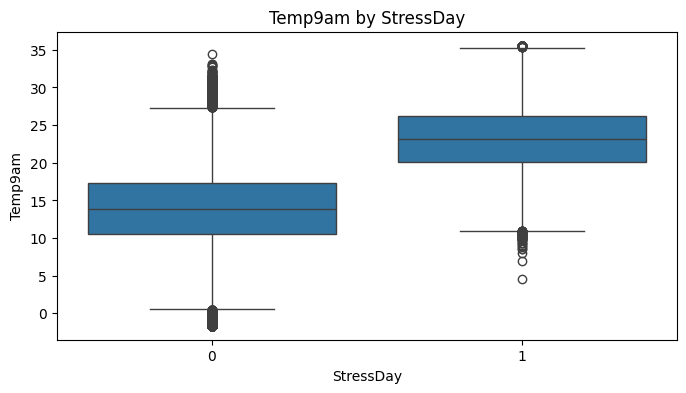

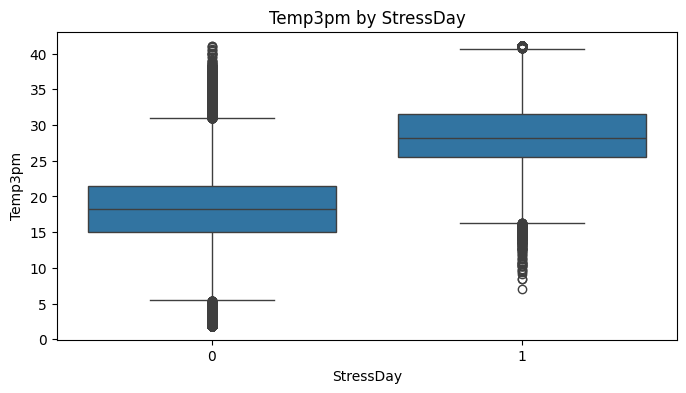

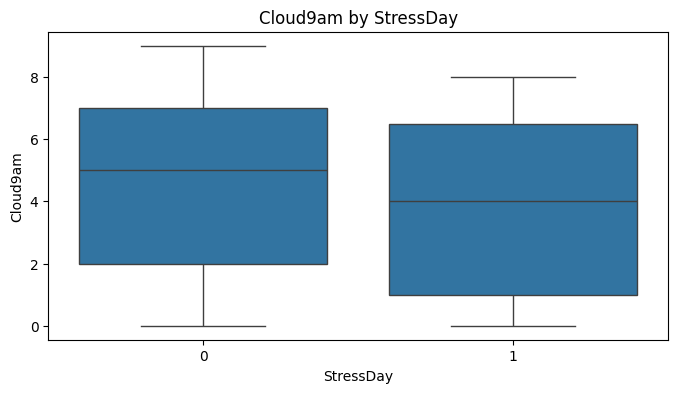

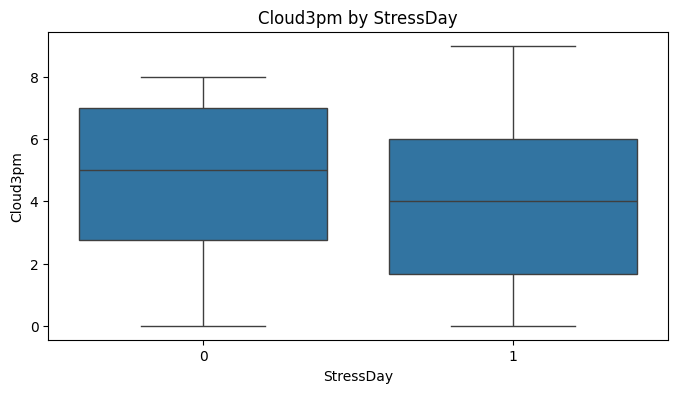

In [39]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='StressDay', y=col, data=climatic_data)
    plt.title(f'{col} by StressDay')
    plt.savefig(os.path.join(plot_dir, f'bivariate_{col}_StressDay.png'))
    plt.show()
    plt.close()

Class distribution of StressDay:
StressDay
0    0.672804
1    0.327196
Name: proportion, dtype: float64


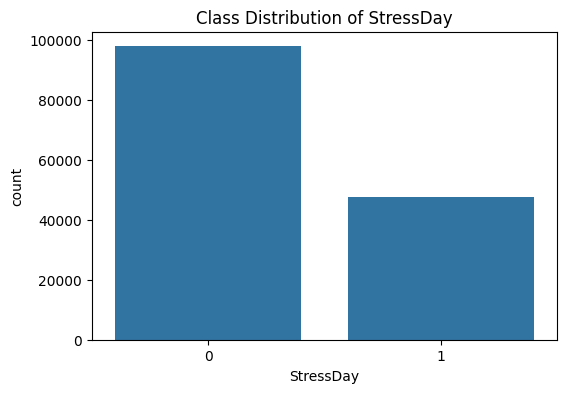

In [40]:
# Class balance test
print("Class distribution of StressDay:")
print(climatic_data['StressDay'].value_counts(normalize=True))
plt.figure(figsize=(6, 4))
sns.countplot(x='StressDay', data=climatic_data)
plt.title('Class Distribution of StressDay')
plt.savefig(os.path.join(plot_dir, 'class_balance.png'))
plt.show()
plt.close()

In [41]:
# Create Season column based on Australian seasons
def get_australian_season(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    elif month in [9, 10, 11]:
        return 'Spring'


In [42]:
climatic_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145460 entries, 2007-11-01 to 2017-06-25
Data columns (total 32 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Location            145460 non-null  object 
 1   MinTemp             145460 non-null  float64
 2   MaxTemp             145460 non-null  float64
 3   Rainfall            145460 non-null  float64
 4   Evaporation         145460 non-null  float64
 5   Sunshine            145460 non-null  float64
 6   WindGustDir         145460 non-null  float64
 7   WindGustSpeed       145460 non-null  float64
 8   WindDir9am          145460 non-null  float64
 9   WindDir3pm          145460 non-null  float64
 10  WindSpeed9am        145460 non-null  float64
 11  WindSpeed3pm        145460 non-null  float64
 12  Humidity9am         145460 non-null  float64
 13  Humidity3pm         145460 non-null  float64
 14  Pressure9am         145460 non-null  float64
 15  Pressure3pm       

In [43]:
#adding season column to dataset
climatic_data['Season'] = climatic_data.index.month.map(get_australian_season)

In [44]:
# Ensure seasons are ordered correctly
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']
climatic_data['Season'] = pd.Categorical(climatic_data['Season'], categories=season_order, ordered=True)

In [45]:
# Define key variables
key_variables = ['MaxTemp', 'Rainfall', 'Humidity3pm', 'WindGustSpeed', 'WindDamageIndex', 'ThermalShock']
stress_cols = ['PollinationRisk', 'DroughtShock', 'DiseaseRisk', 'StressDay']

<ipython-input-46-0c3b1a1dc1b9>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stress_proportions = climatic_data.groupby('Season')[['PollinationRisk', 'DroughtShock', 'DiseaseRisk']].mean().reindex(season_order).reset_index()


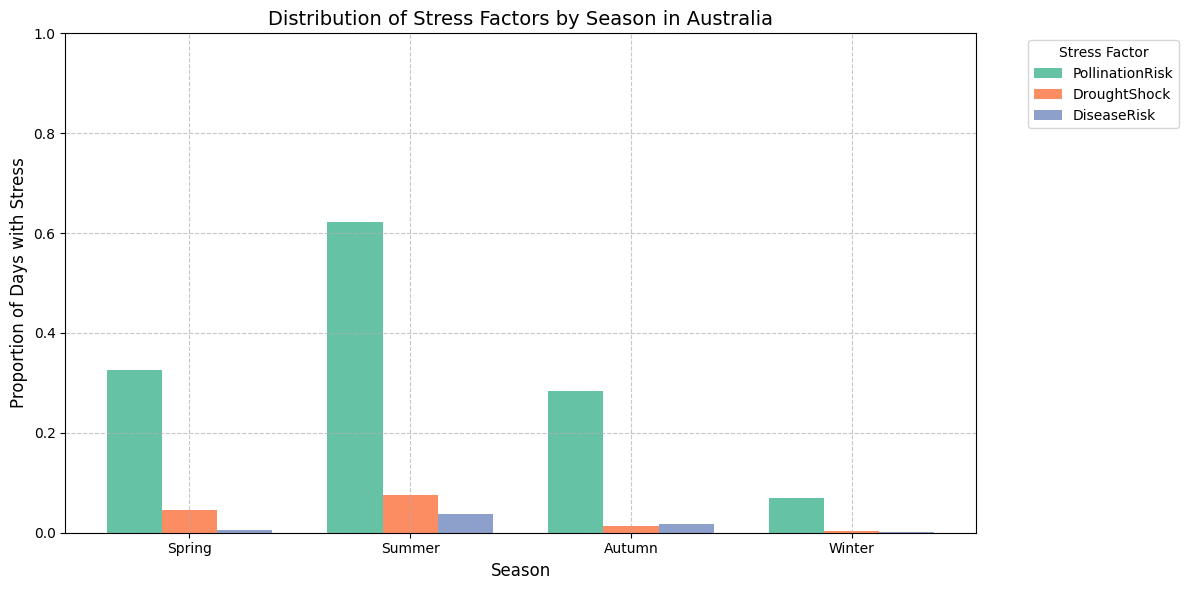

In [46]:
# Task 1: Plot distribution of 3 stress factors over the four seasons (single grouped bar chart)
stress_proportions = climatic_data.groupby('Season')[['PollinationRisk', 'DroughtShock', 'DiseaseRisk']].mean().reindex(season_order).reset_index()
melted_data = stress_proportions.melt(id_vars='Season', value_vars=['PollinationRisk', 'DroughtShock', 'DiseaseRisk'], var_name='StressFactor', value_name='Proportion')
plt.figure(figsize=(12, 6))
color_dict = {'PollinationRisk': sns.color_palette('Set2')[0], 'DroughtShock': sns.color_palette('Set2')[1], 'DiseaseRisk': sns.color_palette('Set2')[2]}
bar_width = 0.25
season_positions = range(len(season_order))
for idx, stress_factor in enumerate(['PollinationRisk', 'DroughtShock', 'DiseaseRisk']):
    subset = melted_data[melted_data['StressFactor'] == stress_factor]
    positions = [x + bar_width * idx for x in season_positions]
    plt.bar(positions, subset['Proportion'], width=bar_width, color=color_dict[stress_factor], label=stress_factor)
plt.xticks([x + bar_width for x in season_positions], season_order)
plt.title('Distribution of Stress Factors by Season in Australia', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Proportion of Days with Stress', fontsize=12)
plt.legend(title='Stress Factor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'stress_distribution.png'))
plt.show()

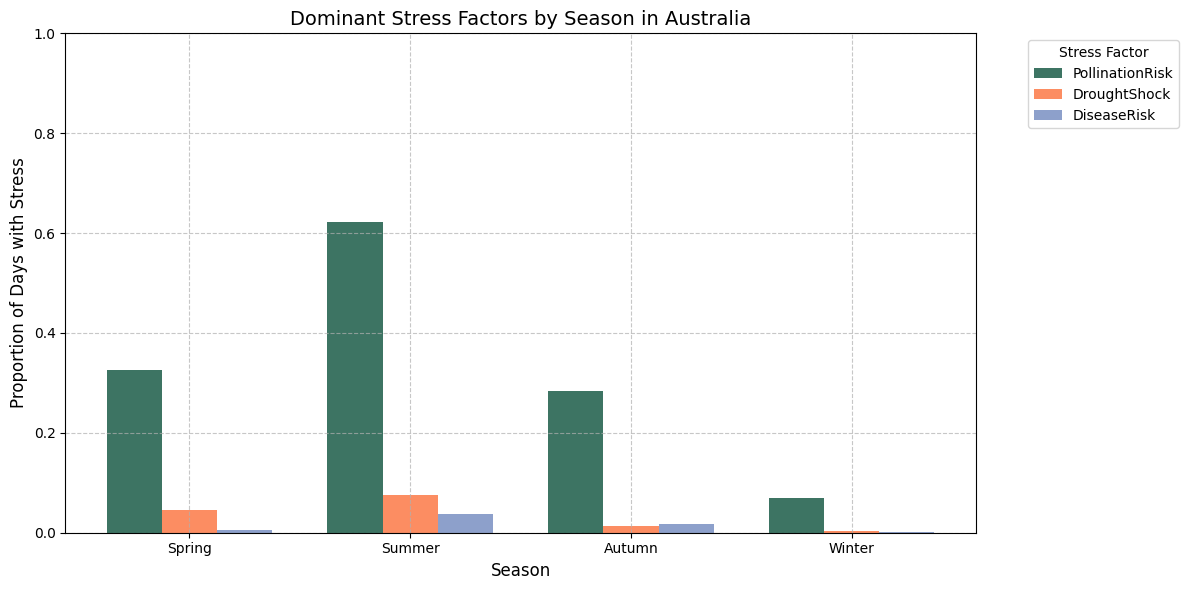

In [47]:
# Task 2: Plot which stress factor is dominant in each season (grouped bar chart with color coding)
stress_proportions['DominantStress'] = stress_proportions[['PollinationRisk', 'DroughtShock', 'DiseaseRisk']].idxmax(axis=1).str.replace('Risk', '').str.replace('Shock', '')
melted_data_dominant = stress_proportions.melt(id_vars=['Season', 'DominantStress'], value_vars=['PollinationRisk', 'DroughtShock', 'DiseaseRisk'], var_name='StressFactor', value_name='Proportion')
def get_color(row):
    base_color = color_dict[row['StressFactor']]
    if row['StressFactor'].replace('Risk', '').replace('Shock', '') == row['DominantStress']:
        return tuple(c * 0.6 for c in base_color)
    return base_color
melted_data_dominant['Color'] = melted_data_dominant.apply(get_color, axis=1)
plt.figure(figsize=(12, 6))
for idx, stress_factor in enumerate(['PollinationRisk', 'DroughtShock', 'DiseaseRisk']):
    subset = melted_data_dominant[melted_data_dominant['StressFactor'] == stress_factor]
    positions = [x + bar_width * idx for x in season_positions]
    plt.bar(positions, subset['Proportion'], width=bar_width, color=subset['Color'], label=stress_factor)
plt.xticks([x + bar_width for x in season_positions], season_order)
plt.title('Dominant Stress Factors by Season in Australia', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Proportion of Days with Stress', fontsize=12)
plt.legend(title='Stress Factor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'dominant_stress_factors.png'))
plt.show()

<ipython-input-48-f8fe49ee3896>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stress_day_proportions = climatic_data.groupby('Season')['StressDay'].mean().reindex(season_order).reset_index()


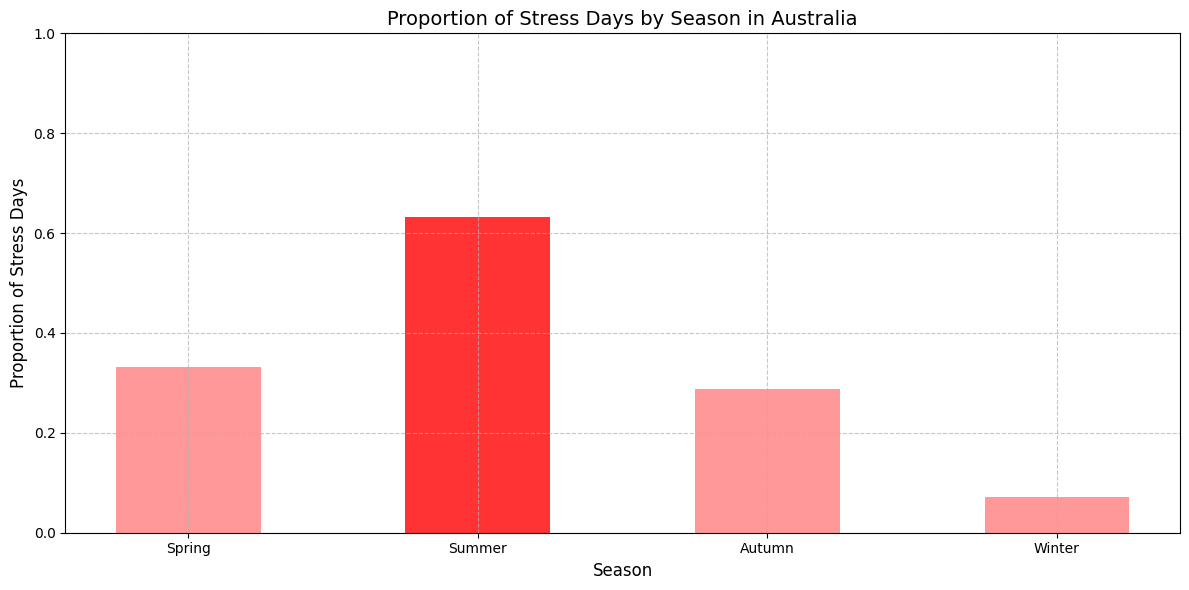

The season with the most stress days is Summer with a proportion of 0.63


In [48]:
# Task 3: Visualize which season has the most stress days (simple bar chart with highlighting)
stress_day_proportions = climatic_data.groupby('Season')['StressDay'].mean().reindex(season_order).reset_index()
max_stress_season = stress_day_proportions.loc[stress_day_proportions['StressDay'].idxmax()]['Season']
max_stress_value = stress_day_proportions['StressDay'].max()
plt.figure(figsize=(12, 6))
colors = ['#ff9999' if season != max_stress_season else '#ff3333' for season in stress_day_proportions['Season']]
plt.bar(stress_day_proportions['Season'], stress_day_proportions['StressDay'], color=colors, width=0.5)
plt.title('Proportion of Stress Days by Season in Australia', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Proportion of Stress Days', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'stress_days_by_season.png'))
plt.show()
print(f"The season with the most stress days is {max_stress_season} with a proportion of {max_stress_value:.2f}")

In [49]:
def plot_seasonal_trends(data, key_variables, stress_cols, season_order):
    # Plot 1: Violin plots for key variables by season
    fig, axes = plt.subplots(3, 2, figsize=(15, 15), sharex=True)
    axes = axes.flatten()
    for i, var in enumerate(key_variables):
        sns.violinplot(x='Season', y=var, data=data, order=season_order, ax=axes[i], inner='quartile', palette='Set2')
        axes[i].set_title(f'{var} by Season in Australia', fontsize=12)
        axes[i].set_xlabel('Season')
        axes[i].set_ylabel(var)
        axes[i].grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    plt.close()


<ipython-input-49-3556c55b58f7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Season', y=var, data=data, order=season_order, ax=axes[i], inner='quartile', palette='Set2')
<ipython-input-49-3556c55b58f7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Season', y=var, data=data, order=season_order, ax=axes[i], inner='quartile', palette='Set2')
<ipython-input-49-3556c55b58f7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Season', y=var, data=data, order=season_order, ax=axes[i], inner='quartile', palette='Set2')
<ipytho

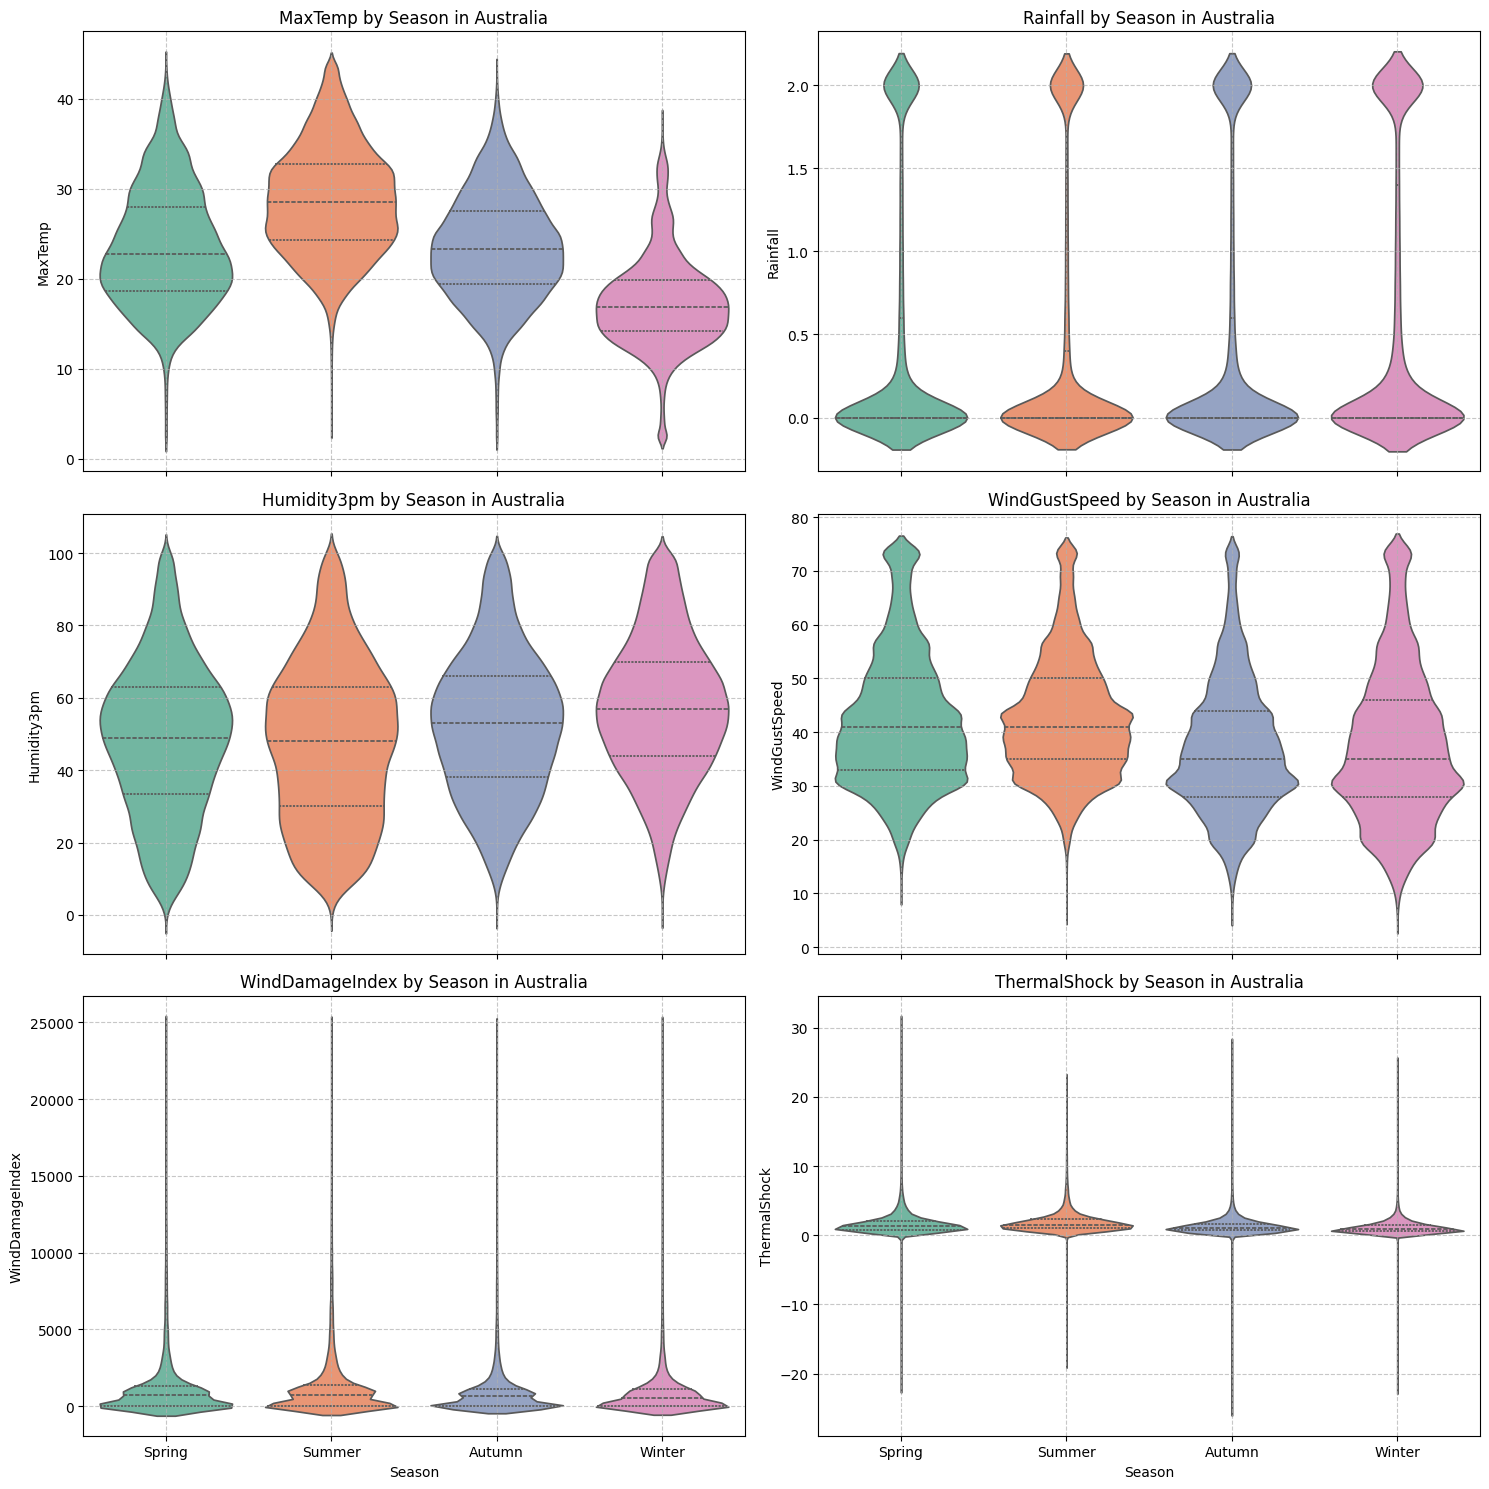

In [50]:
plot_seasonal_trends(climatic_data, key_variables, stress_cols, season_order)

In [51]:
print(min(climatic_data.index))

2007-11-01 00:00:00


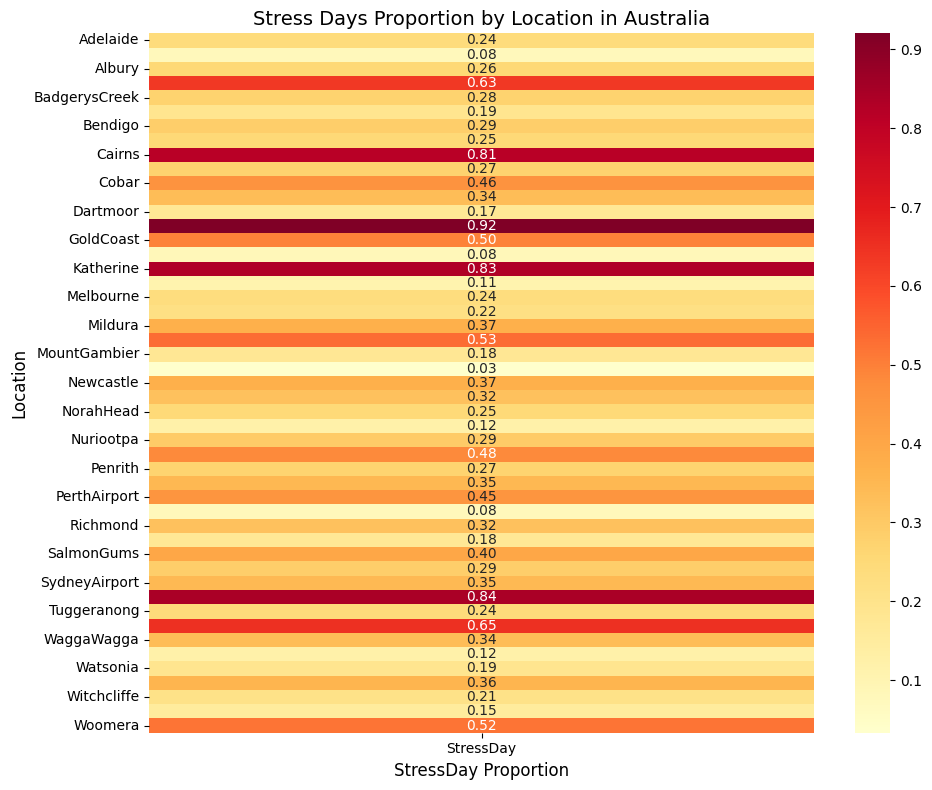

In [52]:
location_stress = climatic_data.groupby('Location')['StressDay'].mean().reset_index()
location_pivot = location_stress.pivot_table(index='Location', values='StressDay')

plt.figure(figsize=(10, 8))
sns.heatmap(location_pivot, cmap='YlOrRd', annot=True, fmt='.2f')
plt.title('Stress Days Proportion by Location in Australia', fontsize=14)
plt.xlabel('StressDay Proportion', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'location_stress_heatmap.png'))
plt.show()

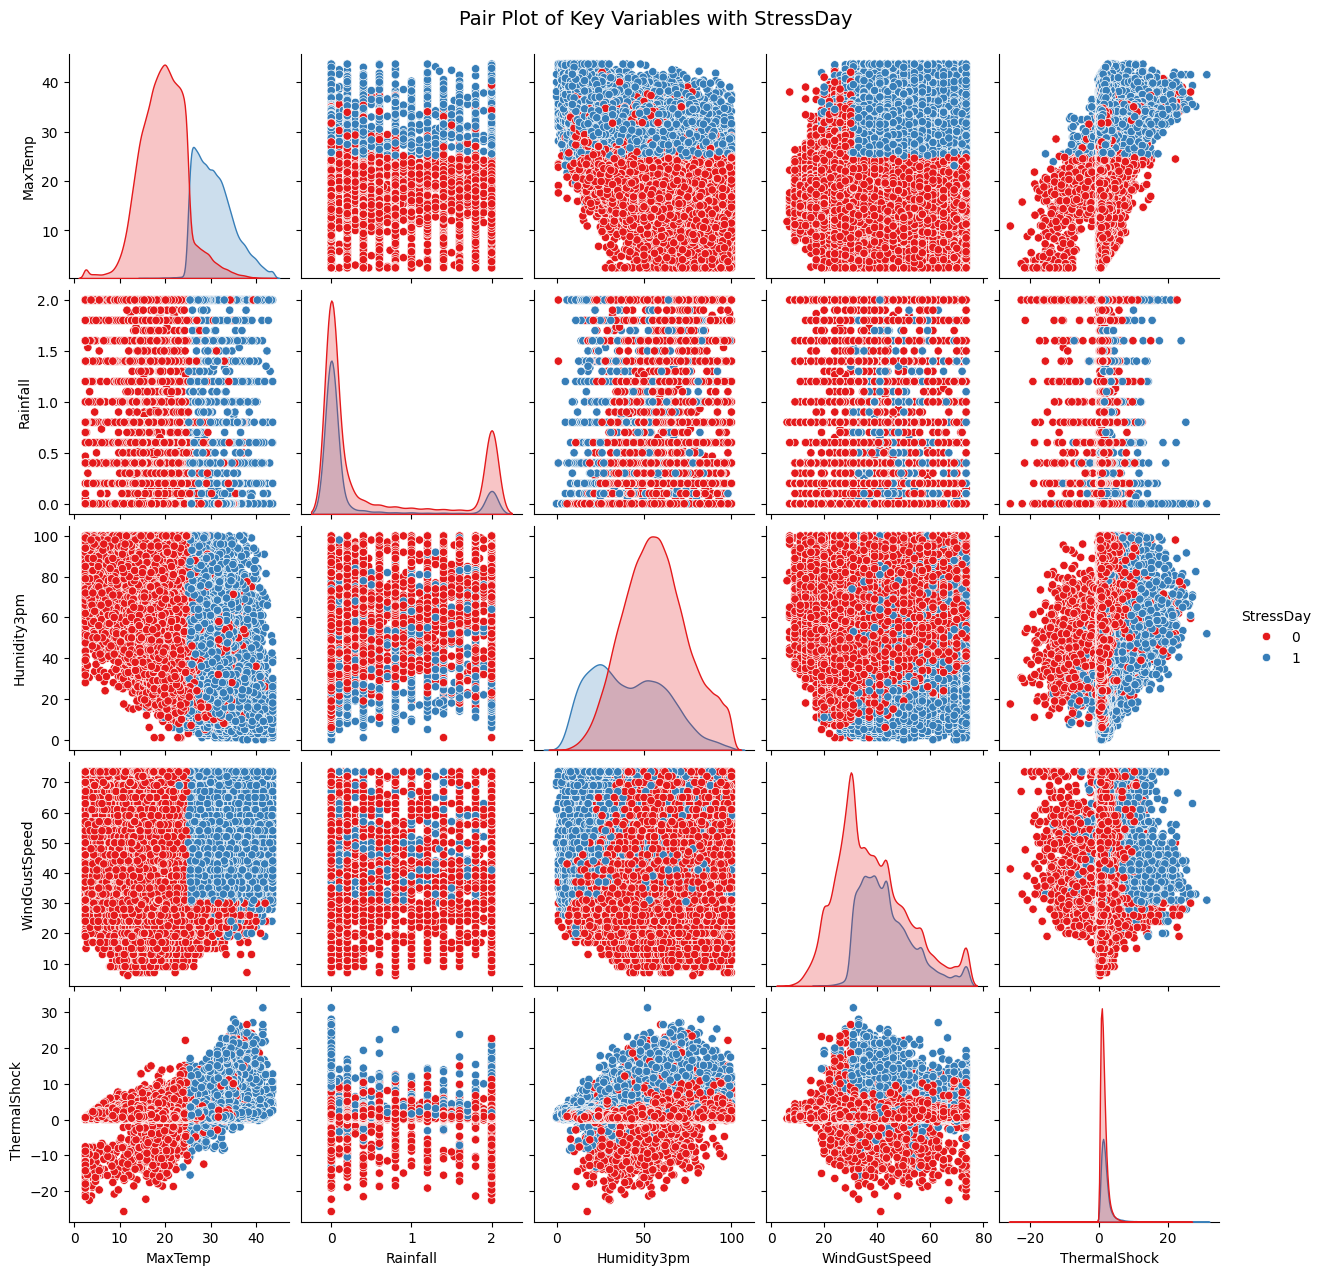

In [52]:
key_vars = ['MaxTemp', 'Rainfall', 'Humidity3pm', 'WindGustSpeed', 'ThermalShock', 'StressDay']
sns.pairplot(climatic_data[key_vars], hue='StressDay', palette='Set1', diag_kind='kde')
plt.suptitle('Pair Plot of Key Variables with StressDay', fontsize=14, y=1.02)
plt.show()

<Figure size 1000x600 with 0 Axes>

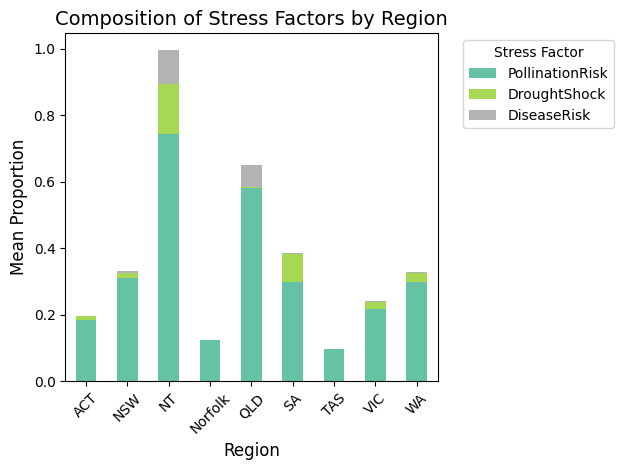

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a mapping of locations to states/regions (simplified for this example)
location_to_region = {
    'Canberra': 'ACT', 'Sydney': 'NSW', 'SydneyAirport': 'NSW', 'Newcastle': 'NSW', 'Wollongong': 'NSW',
    'Williamtown': 'NSW', 'NorahHead': 'NSW', 'BadgerysCreek': 'NSW', 'Penrith': 'NSW', 'Richmond': 'NSW',
    'Albury': 'NSW', 'WaggaWagga': 'NSW', 'Tuggeranong': 'ACT', 'CoffsHarbour': 'NSW', 'Moree': 'NSW',
    'Brisbane': 'QLD', 'GoldCoast': 'QLD', 'Cairns': 'QLD', 'Townsville': 'QLD',
    'Hobart': 'TAS', 'Launceston': 'TAS',
    'Melbourne': 'VIC', 'MelbourneAirport': 'VIC', 'Ballarat': 'VIC', 'Bendigo': 'VIC', 'Watsonia': 'VIC',
    'Sale': 'VIC', 'MountGambier': 'SA', 'Portland': 'VIC', 'Dartmoor': 'VIC',
    'Adelaide': 'SA', 'Nuriootpa': 'SA', 'Woomera': 'SA',
    'Perth': 'WA', 'PerthAirport': 'WA', 'PearceRAAF': 'WA', 'Walpole': 'WA', 'Witchcliffe': 'WA',
    'Albany': 'WA', 'SalmonGums': 'WA',
    'Darwin': 'NT', 'Katherine': 'NT', 'AliceSprings': 'NT', 'Uluru': 'NT',
    'Mildura': 'VIC', 'Nhil': 'VIC',
    'MountGinini': 'ACT',
    'NorfolkIsland': 'Norfolk'
}

# Add a 'Region' column to the dataset
climatic_data['Region'] = climatic_data['Location'].map(location_to_region)

# Group by region and calculate mean stress factors
region_stress_factors = climatic_data.groupby('Region')[['PollinationRisk', 'DroughtShock', 'DiseaseRisk']].mean().reset_index()

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
region_stress_factors.set_index('Region')[['PollinationRisk', 'DroughtShock', 'DiseaseRisk']].plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Composition of Stress Factors by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Mean Proportion', fontsize=12)
plt.legend(title='Stress Factor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'stacked_stress_factors_region.png'))
plt.show()

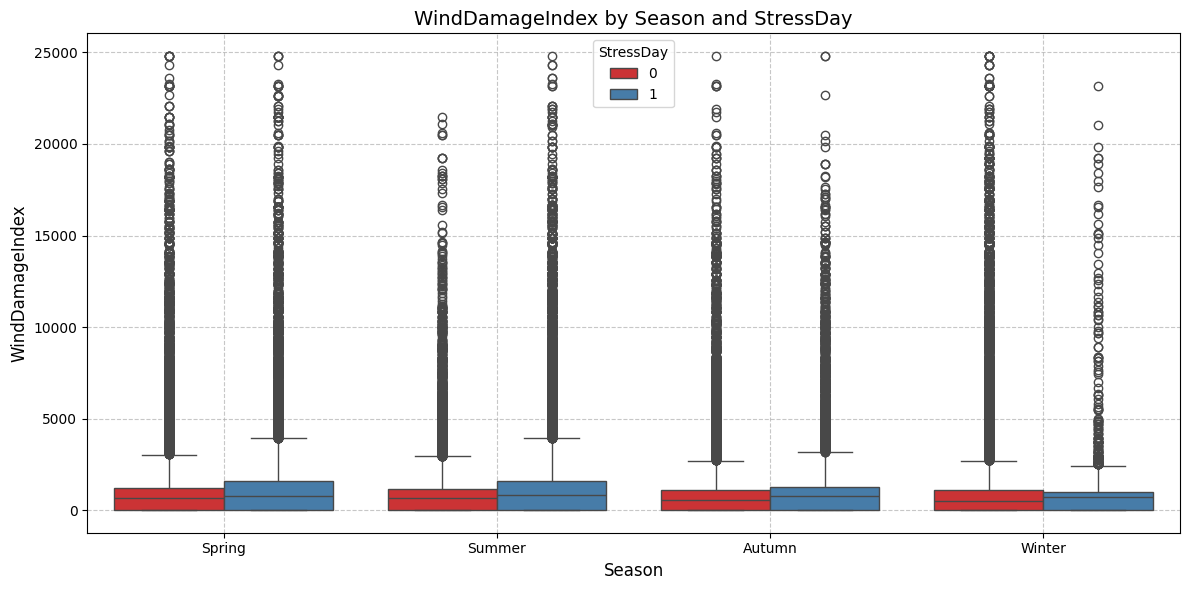

In [54]:
#Box Plot of WindDamageIndex by Season and StressDay
plt.figure(figsize=(12, 6))
sns.boxplot(x='Season', y='WindDamageIndex', hue='StressDay', data=climatic_data, order=season_order, palette='Set1')
plt.title('WindDamageIndex by Season and StressDay', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('WindDamageIndex', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'winddamage_season_stressday.png'))
plt.show()

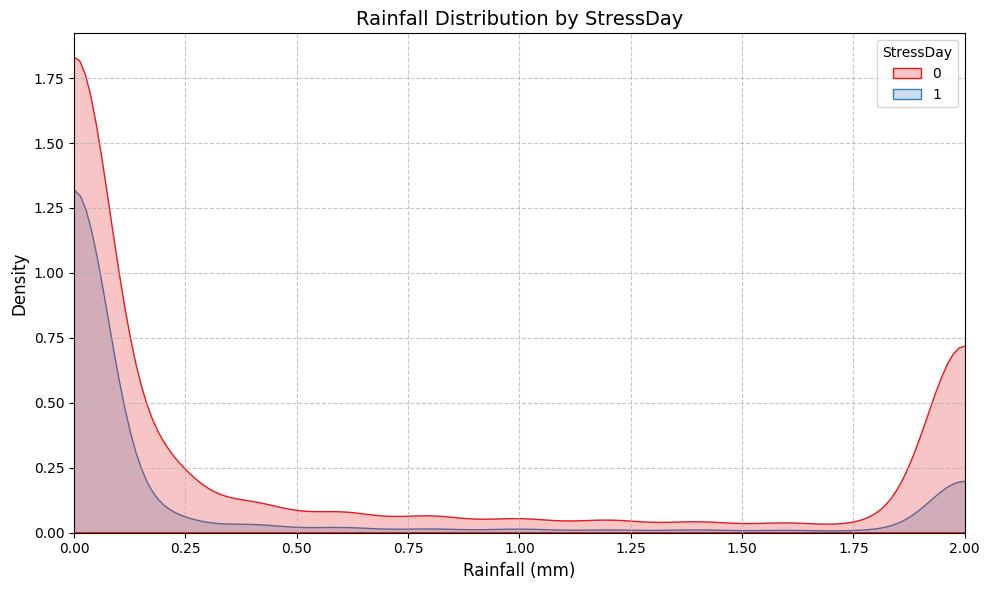

In [55]:
# Rainfall vs. StressDay
plt.figure(figsize=(10, 6))
sns.kdeplot(data=climatic_data, x='Rainfall', hue='StressDay', fill=True, palette='Set1')
plt.title('Rainfall Distribution by StressDay', fontsize=14)
plt.xlabel('Rainfall (mm)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlim(0, climatic_data['Rainfall'].quantile(0.95))  # Limit to 95th percentile for better visualization
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'rainfall_stressday_kde.png'))
plt.show()

<ipython-input-56-660f26e9da59>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_means = climatic_data.groupby('Season')[stress_col].mean().reindex(season_order)
<ipython-input-56-660f26e9da59>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_means = climatic_data.groupby('Season')[stress_col].mean().reindex(season_order)
<ipython-input-56-660f26e9da59>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  s

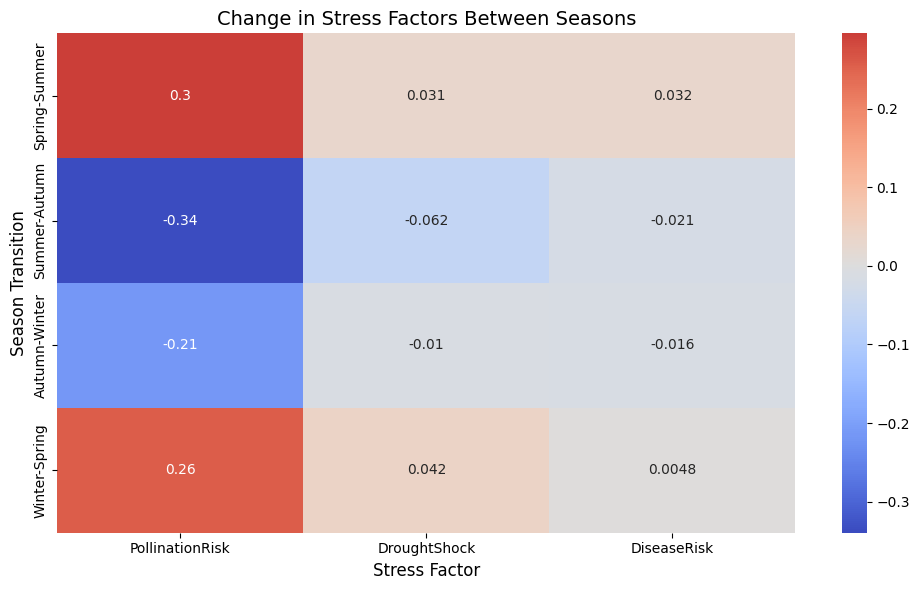

In [56]:
#Seasonal Transition Analysis
stress_transitions = pd.DataFrame(index=['Spring-Summer', 'Summer-Autumn', 'Autumn-Winter', 'Winter-Spring'])
for stress_col in ['PollinationRisk', 'DroughtShock', 'DiseaseRisk']:
    seasonal_means = climatic_data.groupby('Season')[stress_col].mean().reindex(season_order)
    transitions = seasonal_means.diff().dropna()
    transitions.index = ['Spring-Summer', 'Summer-Autumn', 'Autumn-Winter']
    # Add Winter-Spring transition
    transitions.loc['Winter-Spring'] = seasonal_means.iloc[0] - seasonal_means.iloc[-1]
    stress_transitions[stress_col] = transitions

plt.figure(figsize=(10, 6))
sns.heatmap(stress_transitions, annot=True, cmap='coolwarm', center=0)
plt.title('Change in Stress Factors Between Seasons', fontsize=14)
plt.xlabel('Stress Factor', fontsize=12)
plt.ylabel('Season Transition', fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(plot_dir, 'seasonal_stress_transitions.png'))
plt.show()

In [57]:
# Set random seed for reproducibility
np.random.seed(42)

In [58]:
climatic_data_bkp=climatic_data

In [59]:
climatic_data=climatic_data_bkp

In [60]:
climatic_data_bkp.head(5).to_string()

'            Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm RainToday RainTomorrow WindGustDir_cat WindDir9am_cat WindDir3pm_cat  PollinationRisk  DroughtShock  DiseaseRisk  WindDirectionShift  WindDamageIndex  ThermalShock  StressDay  Season Region\nDate                                                                                                                                                                                                                                                                                                                                                                                                                                           \n2007-11-01  Canberra      8.0     24.3       0.0          3.4       6.3        315.0           30.0       225.0       315.0          

In [61]:
def load_and_preprocess_data():
    df = climatic_data
    target_cols = ['PollinationRisk', 'DroughtShock', 'DiseaseRisk', 'ThermalShock', 'WindDamageIndex']
    feature_cols = [
        'MaxTemp', 'MinTemp', 'Temp3pm', 'Temp9am',
        'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
        'Humidity9am', 'Humidity3pm', 'Rainfall',
        'Evaporation', 'Pressure9am', 'Pressure3pm'
    ]
    categorical_cols = [col for col in df.columns if col not in feature_cols + target_cols and df[col].dtype == 'object']

    if not categorical_cols:
        print("Warning: No categorical columns detected for one-hot encoding.")
    else:
        print(f"Detected categorical columns for one-hot encoding: {categorical_cols}")
        df = pd.get_dummies(df, columns=categorical_cols, prefix=categorical_cols, drop_first=False)

        # Collect all one-hot encoded columns and convert them to 1/0
        all_one_hot_cols = []
        for col in categorical_cols:
            if col in feature_cols:
                feature_cols.remove(col)
            one_hot_cols = [c for c in df.columns if c.startswith(f"{col}_")]
            if not one_hot_cols:
                raise ValueError(f"No one-hot encoded columns found for {col}. Check data or column names.")
            all_one_hot_cols.extend(one_hot_cols)
            feature_cols.extend(one_hot_cols)

        # Convert one-hot encoded columns from True/False to 1/0
        if all_one_hot_cols:
            print(f"Converting one-hot encoded columns to 1/0: {all_one_hot_cols}")
            df[all_one_hot_cols] = df[all_one_hot_cols].astype(int)
        print(df)
    # Validate feature_cols
    missing_cols = [col for col in feature_cols if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Feature columns {missing_cols} not found in DataFrame.")

    # Ensure all feature_cols are numeric
    non_numeric_cols = [col for col in feature_cols if not pd.api.types.is_numeric_dtype(df[col])]
    if non_numeric_cols:
        raise ValueError(f"Non-numeric columns found in feature_cols: {non_numeric_cols}")

    for col in ['PollinationRisk', 'DroughtShock', 'DiseaseRisk']:
        df[col] = df[col].astype(int)
    df['ThermalShock'] = (df['ThermalShock'] > df['ThermalShock'].median()).astype(int)
    df['WindDamageIndex'] = (df['WindDamageIndex'] > df['WindDamageIndex'].median()).astype(int)

    return df, feature_cols, target_cols

In [62]:
# Load and preprocess data
climatic_data, feature_cols, target_cols = load_and_preprocess_data()
#print(climatic_data.head(5))


Detected categorical columns for one-hot encoding: ['Location', 'RainToday', 'RainTomorrow', 'WindGustDir_cat', 'WindDir9am_cat', 'WindDir3pm_cat', 'Region']
Converting one-hot encoded columns to 1/0: ['Location_Adelaide', 'Location_Albany', 'Location_Albury', 'Location_AliceSprings', 'Location_BadgerysCreek', 'Location_Ballarat', 'Location_Bendigo', 'Location_Brisbane', 'Location_Cairns', 'Location_Canberra', 'Location_Cobar', 'Location_CoffsHarbour', 'Location_Dartmoor', 'Location_Darwin', 'Location_GoldCoast', 'Location_Hobart', 'Location_Katherine', 'Location_Launceston', 'Location_Melbourne', 'Location_MelbourneAirport', 'Location_Mildura', 'Location_Moree', 'Location_MountGambier', 'Location_MountGinini', 'Location_Newcastle', 'Location_Nhil', 'Location_NorahHead', 'Location_NorfolkIsland', 'Location_Nuriootpa', 'Location_PearceRAAF', 'Location_Penrith', 'Location_Perth', 'Location_PerthAirport', 'Location_Portland', 'Location_Richmond', 'Location_Sale', 'Location_SalmonGums', 'L

In [63]:
#Feature engineering and selection
def feature_engineering(df, feature_cols):
    df['TempRange'] = df['MaxTemp'] - df['MinTemp']
    df['HumidityChange'] = df['Humidity3pm'] - df['Humidity9am']
    df['PressureChange'] = df['Pressure3pm'] - df['Pressure9am']

    for col in ['MaxTemp', 'Rainfall', 'Humidity9am', 'WindGustSpeed']:
        df[f'{col}_lag1'] = df[col].shift(1).fillna(df[col].mean())
    feature_cols.extend(['TempRange', 'HumidityChange', 'PressureChange',
                        'MaxTemp_lag1', 'Rainfall_lag1', 'Humidity9am_lag1', 'WindGustSpeed_lag1'])

    #Filter out non-numeric columns before correlation
    numeric_feature_cols = [col for col in feature_cols if pd.api.types.is_numeric_dtype(df[col])]
    if len(numeric_feature_cols) < len(feature_cols):
        print(f"Warning: Non-numeric columns excluded from correlation: {set(feature_cols) - set(numeric_feature_cols)}")

    corr_matrix = df[numeric_feature_cols].corr(method='spearman')
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > 0.8:
                high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
    to_remove = set()
    for col1, col2, _ in high_corr_pairs:
        to_remove.add(col2)
    feature_cols = [col for col in feature_cols if col not in to_remove]
    print(to_remove)
    return df, feature_cols


In [64]:
# Feature engineering
climatic_data, feature_cols = feature_engineering(climatic_data, feature_cols)
print(climatic_data.head(5).to_string())

<ipython-input-63-f4d2358d55fd>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['TempRange'] = df['MaxTemp'] - df['MinTemp']
<ipython-input-63-f4d2358d55fd>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['HumidityChange'] = df['Humidity3pm'] - df['Humidity9am']
<ipython-input-63-f4d2358d55fd>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de

{'Pressure9am', 'MinTemp', 'Rainfall', 'Temp3pm', 'Location_NorfolkIsland', 'RainToday_No', 'RainTomorrow_No', 'MaxTemp'}
            MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  PollinationRisk  DroughtShock  DiseaseRisk  WindDirectionShift  WindDamageIndex  ThermalShock  StressDay  Season  Location_Adelaide  Location_Albany  Location_Albury  Location_AliceSprings  Location_BadgerysCreek  Location_Ballarat  Location_Bendigo  Location_Brisbane  Location_Cairns  Location_Canberra  Location_Cobar  Location_CoffsHarbour  Location_Dartmoor  Location_Darwin  Location_GoldCoast  Location_Hobart  Location_Katherine  Location_Launceston  Location_Melbourne  Location_MelbourneAirport  Location_Mildura  Location_Moree  Location_MountGambier  Location_MountGinini  Location_Newcastle  Location_Nhil  Location_NorahHead  Locat

In [65]:
#Data preparation
def prepare_data(df, feature_cols, target_cols):
    X = df[feature_cols]
    y = df[target_cols]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.3, random_state=42, shuffle=False
    )
    timesteps = 5
    X_train_lstm = []
    y_train_lstm = []
    for i in range(timesteps, len(X_train)):
        X_train_lstm.append(X_train[i-timesteps:i])
        y_train_lstm.append(y_train.iloc[i])
    X_test_lstm = []
    y_test_lstm = []
    for i in range(timesteps, len(X_test)):
        X_test_lstm.append(X_test[i-timesteps:i])
        y_test_lstm.append(y_test.iloc[i])
    X_train_lstm = np.array(X_train_lstm)
    y_train_lstm = np.array(y_train_lstm)
    X_test_lstm = np.array(X_test_lstm)
    y_test_lstm = np.array(y_test_lstm)
    return X_train, X_test, y_train, y_test, X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm, scaler, X.columns



In [67]:
# Prepare data
X_train, X_test, y_train, y_test, X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm, scaler, feature_names = prepare_data(
        climatic_data, feature_cols, target_cols
    )

In [68]:
#Model definitions

def build_xgboost_model():
    return XGBClassifier(
        n_estimators=100,
        max_depth=5,
        learning_rate=0.1,
        random_state=42,
        n_jobs=-1
    )

def build_lstm_model(input_shape, output_dim):
    ### MODIFIED ### Use Input layer instead of input_shape in LSTM to fix Keras warning
    model = Sequential([
        Input(shape=input_shape),
        Bidirectional(LSTM(128, return_sequences=True)),
        Dropout(0.3),
        Bidirectional(LSTM(64)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(output_dim, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def build_rf_model():
    return RandomForestClassifier(
        n_estimators=100,
        max_depth=5,
        random_state=42,
        n_jobs=-1
    )

In [69]:
#Model training and evaluation
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test, model_type='tree', lstm_data=None):
    if model_type == 'lstm':
        early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
        model.fit(
            lstm_data[0], lstm_data[2],
            epochs=50,
            batch_size=32,
            validation_split=0.2,
            callbacks=[early_stopping],
            verbose=0
        )
        y_pred_proba = model.predict(lstm_data[1])
        y_pred = (y_pred_proba > 0.5).astype(int)
        y_test_eval = lstm_data[3]
        ### ADDED ### Compute metrics for LSTM to fix UnboundLocalError
        if not isinstance(y_test_eval, np.ndarray):
            y_test_eval = np.array(y_test_eval)
        metrics = {}
        for i, col in enumerate(y_test.columns):
            metrics[col] = {
                'accuracy': accuracy_score(y_test_eval[:, i], y_pred[:, i]),
                'precision': precision_score(y_test_eval[:, i], y_pred[:, i], zero_division=0),
                'recall': recall_score(y_test_eval[:, i], y_pred[:, i], zero_division=0),
                'f1': f1_score(y_test_eval[:, i], y_pred[:, i], zero_division=0),
                'roc_auc': roc_auc_score(y_test_eval[:, i], y_pred_proba[:, i])
            }
        ### ADDED ### Return the trained model
        return metrics, y_pred, y_pred_proba, model
    else:
        y_pred = np.zeros_like(y_test)
        y_pred_proba = np.zeros_like(y_test, dtype=float)
       # Store models for each target
        models_per_target = []
        for i in range(y_test.shape[1]):
           # Create a new model instance to avoid overwriting
            model_clone = type(model)()
            # Initialize with same parameters
            if isinstance(model, XGBClassifier):
                model_clone = XGBClassifier(
                    n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42, n_jobs=-1
                )
            elif isinstance(model, RandomForestClassifier):
                model_clone = RandomForestClassifier(
                    n_estimators=100, max_depth=5, random_state=42, n_jobs=-1
                )
            model_clone.fit(X_train, y_train.iloc[:, i])
            y_pred[:, i] = model_clone.predict(X_test)
            y_pred_proba[:, i] = model_clone.predict_proba(X_test)[:, 1]
            ### ADDED ### Append the trained model
            models_per_target.append(model_clone)
        y_test_eval = y_test.values
    if not isinstance(y_test_eval, np.ndarray):
        y_test_eval = np.array(y_test_eval)
    metrics = {}
    for i, col in enumerate(y_test.columns):
        metrics[col] = {
            'accuracy': accuracy_score(y_test_eval[:, i], y_pred[:, i]),
            'precision': precision_score(y_test_eval[:, i], y_pred[:, i], zero_division=0),
            'recall': recall_score(y_test_eval[:, i], y_pred[:, i], zero_division=0),
            'f1': f1_score(y_test_eval[:, i], y_pred[:, i], zero_division=0),
            'roc_auc': roc_auc_score(y_test_eval[:, i], y_pred_proba[:, i])
        }
   # Return models_per_target for tree models
    return metrics, y_pred, y_pred_proba, models_per_target if model_type == 'tree' else model

In [70]:
from tensorflow.keras.layers import Input

In [71]:
# Train and evaluate models

models = {
    'XGBoost': build_xgboost_model(),
    'RandomForest': build_rf_model(),
    'LSTM': build_lstm_model((X_train_lstm.shape[1], X_train_lstm.shape[2]), len
(target_cols))
}
metrics_dict = {}
predictions = {}
probabilities = {}
### ADDED ### Store models for each target
models_per_target = {}
for model_name, model in models.items():
    if model_name == 'LSTM':
        metrics, y_pred, y_pred_proba, trained_model = train_and_evaluate_model(
            model, X_train, y_train, X_test, y_test,
            model_type='lstm', lstm_data=(X_train_lstm, X_test_lstm, y_train_lstm,
y_test_lstm)
        )
        ### ADDED ### Store single LSTM model
        models_per_target[model_name] = trained_model
    else:
        metrics, y_pred, y_pred_proba, target_models = train_and_evaluate_model(
            model, X_train, y_train, X_test, y_test, model_type='tree'
        )
        ### ADDED ### Store list of target-specific models
        models_per_target[model_name] = target_models
    metrics_dict[model_name] = metrics
    predictions[model_name] = y_pred
    probabilities[model_name] = y_pred_proba

1364/1364 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step


In [72]:
#Explainability
def generate_explanations(models_per_target, X_train, X_test, feature_names, y_test, model_type='tree', lstm_data=None):
    ### MODIFIED ### Entire function updated to handle models_per_target
    explanations = []
    if model_type == 'tree':
        for idx, model in enumerate(models_per_target):
            explainer = shap.TreeExplainer(model)
            shap_values = explainer.shap_values(X_test)
            # For binary classification, shap_values is a single array or a list with one element
            if isinstance(shap_values, list):
                shap_summary = np.mean(np.abs(shap_values[-1]), axis=0)  # Use last element (positive class)
            else:
                shap_summary = np.mean(np.abs(shap_values), axis=0)
            for i, feature in enumerate(feature_names):
                explanations.append(f"Target {y_test.columns[idx]}: Feature {feature} has average SHAP impact of {shap_summary[i]:.4f}")
    else:
        model = models_per_target  # Single LSTM model
        lime_explainer = lime.lime_tabular.LimeTabularExplainer(
            X_train,
            feature_names=feature_names,
            class_names=y_test.columns,
            mode='classification',
            discretize_continuous=False
        )
        for i in range(min(5, len(X_test))):
            def lstm_predict(x):
                n_samples = x.shape[0]
                x_repeated = np.repeat(x[:, np.newaxis, :], lstm_data[1].shape[1], axis=1)
                return model.predict(x_repeated, verbose=0)
            for label_idx, label in enumerate(y_test.columns):
                def lstm_predict_label(x):
                    probs = lstm_predict(x)[:, label_idx]
                    output = np.vstack((1 - probs, probs)).T
                    if not np.allclose(output.sum(axis=1), 1.0, atol=1e-5):
                        warnings.warn(f"Probabilities do not sum to 1 for label {label}: {output.sum(axis=1)}")
                    return output
                exp = lime_explainer.explain_instance(
                    X_test[i],
                    lstm_predict_label,
                    num_features=5,
                    labels=[1]
                )
                for feature_name, weight in exp.as_list(label=1):
                    try:
                        feature_idx = feature_names.get_loc(feature_name)
                        explanations.append(f"Sample {i}, Label {label}: {feature_name} contributes {weight:.4f}")
                    except KeyError:
                        explanations.append(f"Sample {i}, Label {label}: {feature_name} (unknown feature) contributes {weight:.4f}")
    return explanations



In [73]:
# Generate explanations
explanations = generate_explanations(
    models_per_target[model_name], X_train, X_test, feature_names, y_test,
    model_type='tree' if model_name != 'LSTM' else 'lstm',
    lstm_data=(X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm)
)
print(f"\nExplanations for {model_name}:")
for exp in explanations[:5]:
    print(exp)


Explanations for LSTM:
Sample 0, Label PollinationRisk: Temp9am contributes 0.1149
Sample 0, Label PollinationRisk: MaxTemp_lag1 contributes 0.0812
Sample 0, Label PollinationRisk: Evaporation contributes 0.0646
Sample 0, Label PollinationRisk: Location_MountGinini contributes 0.0311
Sample 0, Label PollinationRisk: Location_Darwin contributes -0.0287


In [74]:
#Visualization
def visualize_results(metrics_dict):
    ## RECENTLY CHANGED ## Add flush=True to force printing
    print("Starting visualize_results function...", flush=True)
    print("Current working directory:", os.getcwd(), flush=True)
    print("Metrics dictionary keys:", list(metrics_dict.keys()), flush=True)
    metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    models = list(metrics_dict.keys())
    target_labels = list(metrics_dict[models[0]].keys())
    print("Target labels:", target_labels, flush=True)
    print("Metrics to plot:", metrics, flush=True)
    print("Generating bar plot...", flush=True)
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()
    for i, metric in enumerate(metrics):
        avg_values = []
        for model_name in models:
            model_metrics = [metrics_dict[model_name][target][metric] for target in target_labels]
            avg_values.append(np.mean(model_metrics))
        print(f"Average {metric} values: {avg_values}", flush=True)
        sns.barplot(x=avg_values, y=models, hue=models, ax=axes[i], palette='viridis', legend=False)
        axes[i].set_title(f'Average {metric.capitalize()}')
        axes[i].set_xlabel(metric.capitalize())
        axes[i].set_xlim(0, 1)
        for j, v in enumerate(avg_values):
            axes[i].text(v + 0.01, j, f'{v:.4f}', va='center')
    if len(metrics) < len(axes):
        fig.delaxes(axes[-1])
    plt.tight_layout()
    save_path = os.path.join(os.getcwd(), 'average_model_comparison.png')
    print(f"Saving bar plot to: {save_path}", flush=True)
    plt.savefig(save_path, dpi=300)
    ## RECENTLY CHANGED ## Add plt.show() to display bar plot on screen
    plt.show()
    plt.close()
    print("Generating heatmaps...", flush=True)
    for metric in metrics:
        heatmap_data = pd.DataFrame(index=target_labels, columns=models)
        for model_name in models:
            for target in target_labels:
                heatmap_data.loc[target, model_name] = metrics_dict[model_name][target][metric]
        print(f"Heatmap data for {metric}:\n{heatmap_data}", flush=True)
        plt.figure(figsize=(10, 8))
        sns.heatmap(heatmap_data.astype(float), annot=True, fmt='.4f', cmap='YlGnBu', vmin=0, vmax=1)
        plt.title(f'{metric.capitalize()} per Label and Model')
        plt.xlabel('Model')
        plt.ylabel('Target Label')
        plt.tight_layout()
        save_path = os.path.join(os.getcwd(), f'{metric}_heatmap.png')
        print(f"Saving heatmap for {metric} to: {save_path}", flush=True)
        plt.savefig(save_path, dpi=300)
        ## RECENTLY CHANGED ## Add plt.show() to display heatmap on screen
        plt.show()
        plt.close()


Starting visualize_results function...
Current working directory: /content
Metrics dictionary keys: ['XGBoost', 'RandomForest', 'LSTM']
Target labels: ['PollinationRisk', 'DroughtShock', 'DiseaseRisk', 'ThermalShock', 'WindDamageIndex']
Metrics to plot: ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
Generating bar plot...
Average accuracy values: [np.float64(0.9043035886154268), np.float64(0.8279664512580778), np.float64(0.7729058281575871)]
Average precision values: [np.float64(0.8767057566212835), np.float64(0.6457564217881251), np.float64(0.35860641874559496)]
Average recall values: [np.float64(0.8547289361181052), np.float64(0.4819624510550381), np.float64(0.3621705635412158)]
Average f1 values: [np.float64(0.8653492760889103), np.float64(0.5220802924196947), np.float64(0.36026246886366664)]
Average roc_auc values: [np.float64(0.9408729999073693), np.float64(0.8670074397433766), np.float64(0.7082193001237232)]
Saving bar plot to: /content/average_model_comparison.png


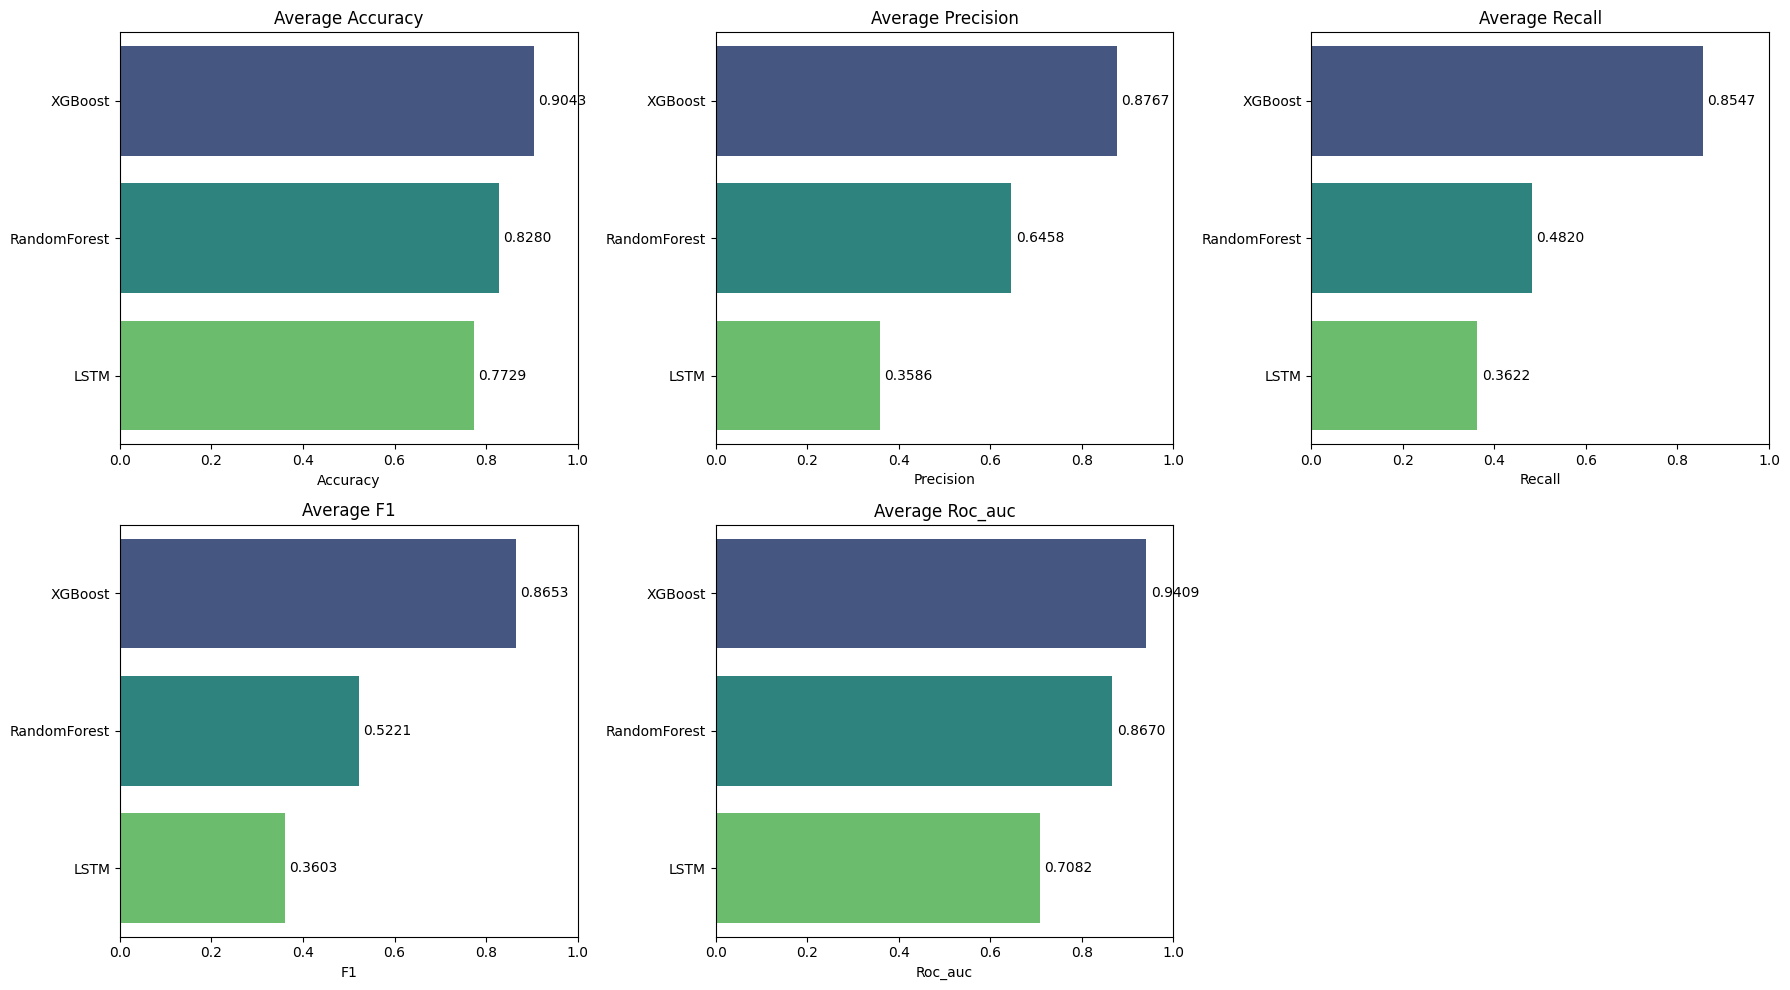

Generating heatmaps...
Heatmap data for accuracy:
                  XGBoost RandomForest      LSTM
PollinationRisk  0.964114     0.891746  0.746545
DroughtShock      0.99961     0.977588  0.967639
DiseaseRisk      0.994088     0.982492   0.98249
ThermalShock     0.694486      0.65514  0.620081
WindDamageIndex  0.869219     0.632866  0.547773
Saving heatmap for accuracy to: /content/accuracy_heatmap.png


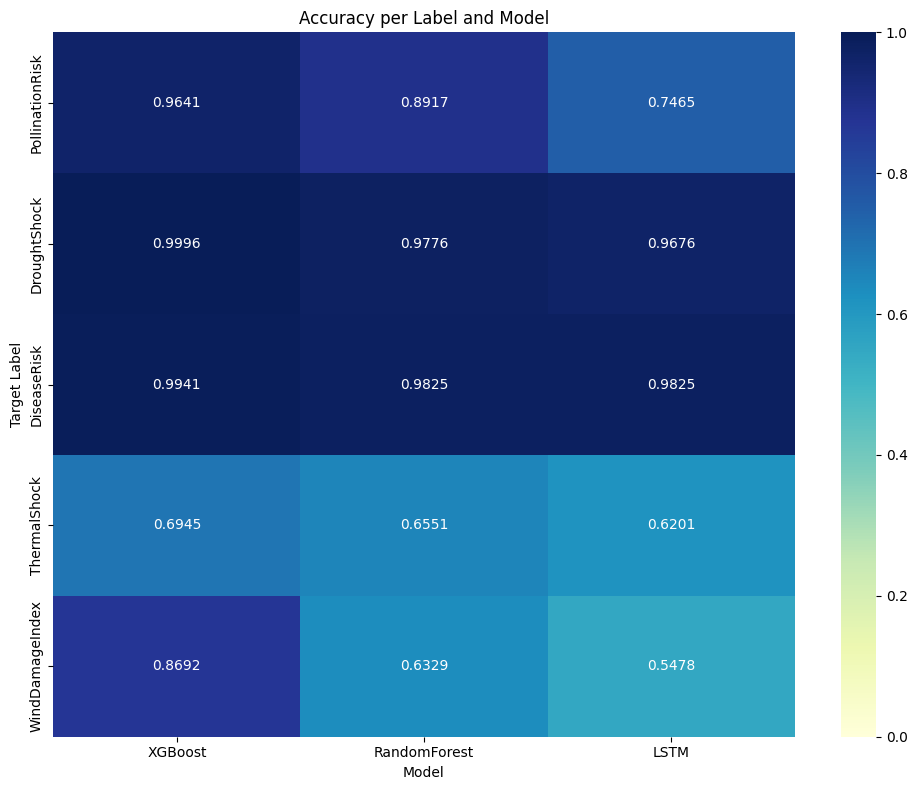

Heatmap data for precision:
                  XGBoost RandomForest      LSTM
PollinationRisk  0.951704     0.968441  0.630357
DroughtShock     0.997149     0.997706       0.0
DiseaseRisk      0.861429          0.0       0.0
ThermalShock     0.708914     0.661078   0.62941
WindDamageIndex  0.864334     0.601557  0.533266
Saving heatmap for precision to: /content/precision_heatmap.png


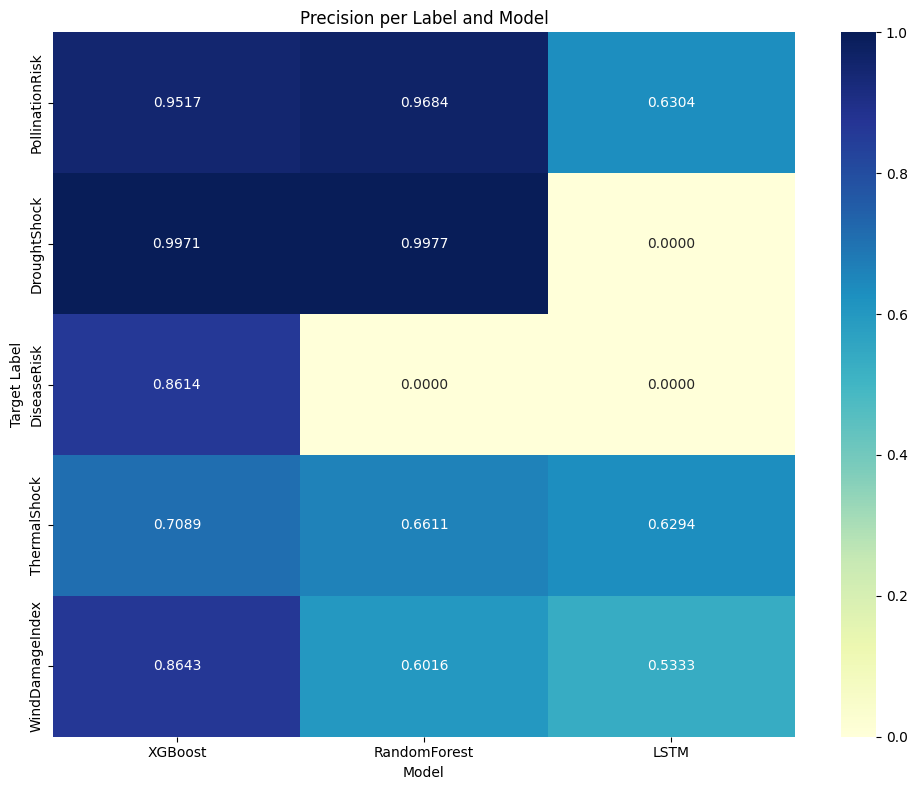

Heatmap data for recall:
                  XGBoost RandomForest      LSTM
PollinationRisk  0.942345     0.704789  0.616385
DroughtShock     0.990793     0.308074       0.0
DiseaseRisk      0.789267          0.0       0.0
ThermalShock     0.683772     0.669219   0.62645
WindDamageIndex  0.867467     0.727731  0.568018
Saving heatmap for recall to: /content/recall_heatmap.png


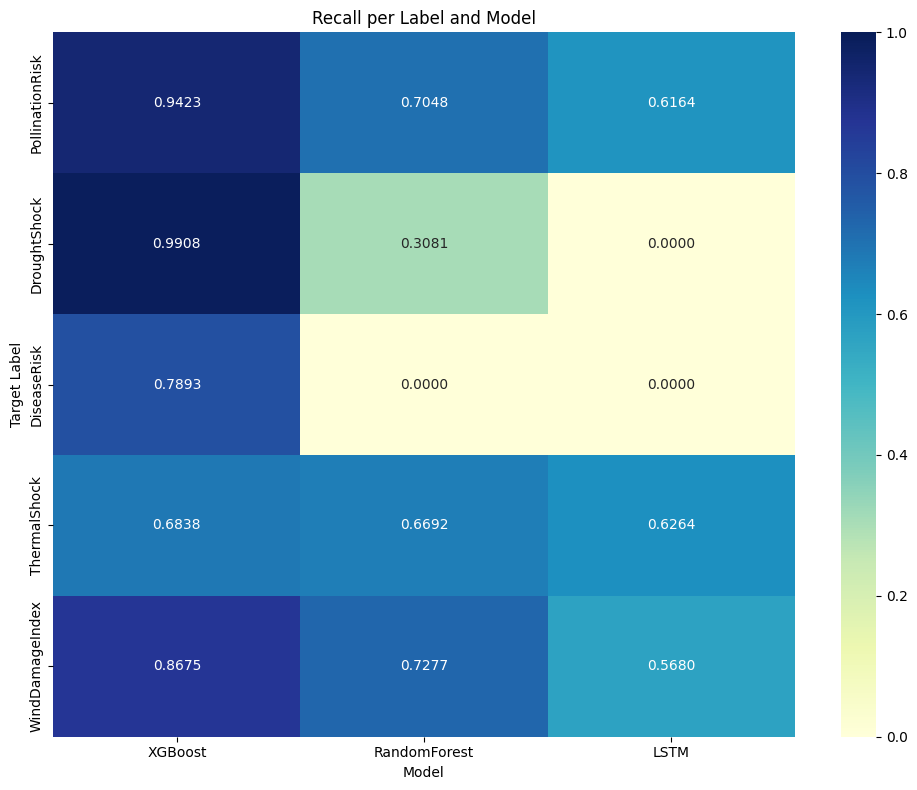

Heatmap data for f1:
                  XGBoost RandomForest      LSTM
PollinationRisk  0.947001     0.815843  0.623293
DroughtShock     0.993961     0.470779       0.0
DiseaseRisk       0.82377          0.0       0.0
ThermalShock     0.696116     0.665124  0.627926
WindDamageIndex  0.865898     0.658656  0.550093
Saving heatmap for f1 to: /content/f1_heatmap.png


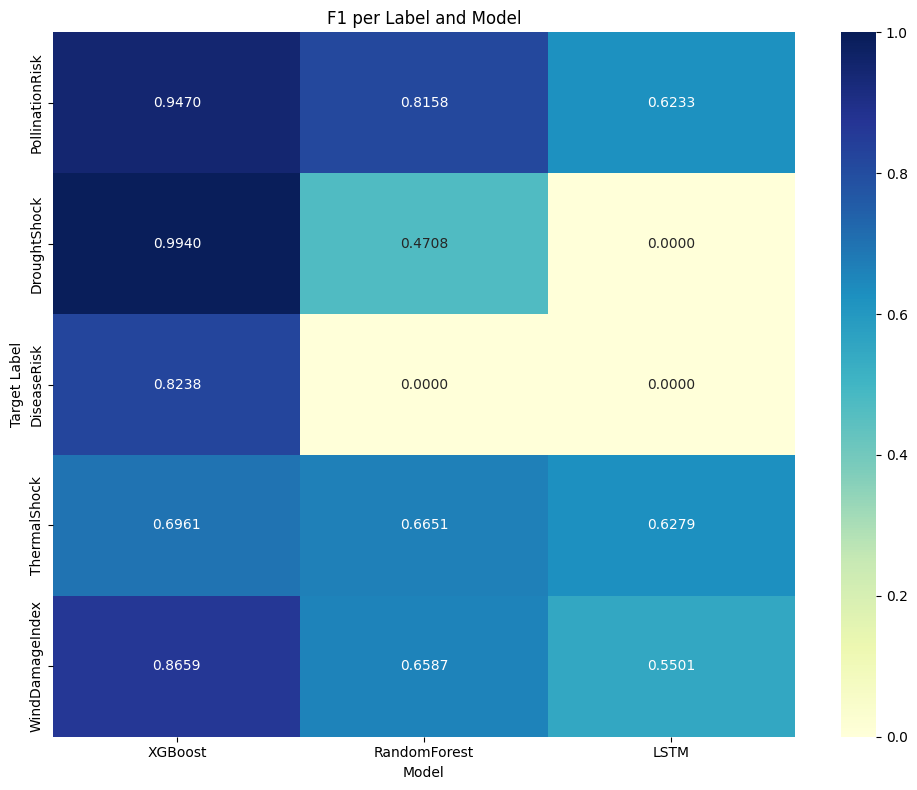

Heatmap data for roc_auc:
                  XGBoost RandomForest      LSTM
PollinationRisk  0.995221     0.970421  0.801082
DroughtShock     0.999961     0.996558  0.799785
DiseaseRisk      0.997966     0.962303  0.728833
ThermalShock     0.767232     0.719458  0.651304
WindDamageIndex  0.943985     0.686297  0.560094
Saving heatmap for roc_auc to: /content/roc_auc_heatmap.png


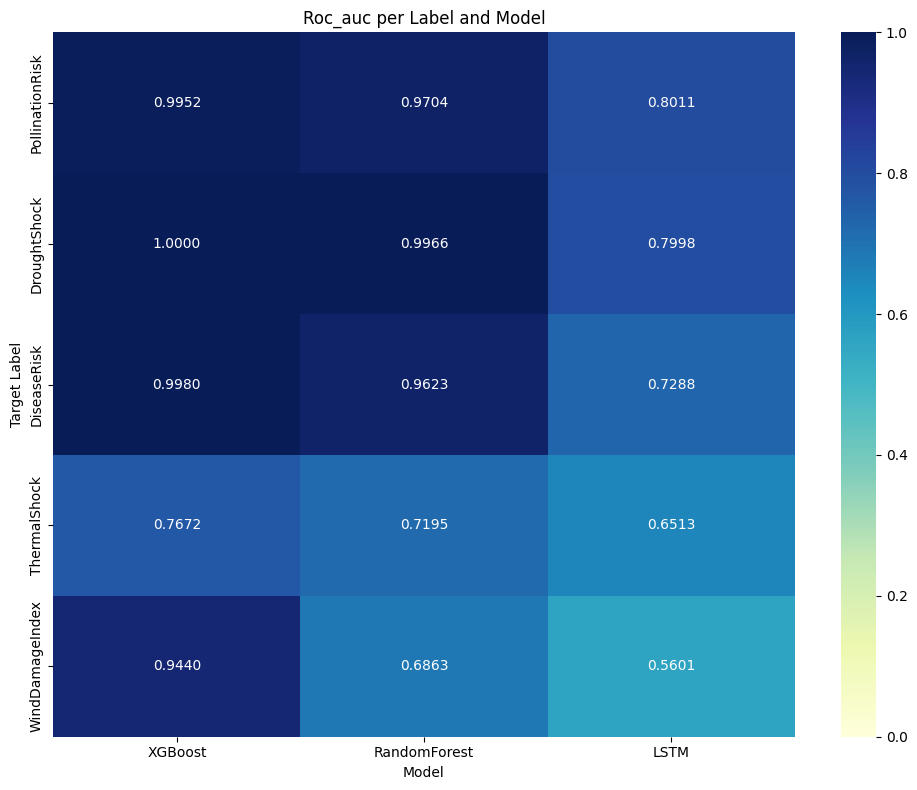

In [75]:
# Visualize results
visualize_results(metrics_dict)


In [76]:
#Generate farmer-friendly alerts
def generate_farmer_alerts(X_test, y_pred, feature_names, target_names, scaler, models_per_target, lstm_data=None, max_samples=None):
    X_test_orig = scaler.inverse_transform(X_test)
    alerts = []

    # Added max_samples parameter and logic to process all test samples
    # Adjust num_samples based on y_pred size to fix IndexError
    num_samples = len(X_test) if max_samples is None else min(max_samples, len(X_test))

    # Track samples with alerts
    samples_with_alerts = 0
    # Changed models to models_per_target
    for model_name, model_list in models_per_target.items():
        print(f"\nGenerating alerts for {model_name}...")
        model_type = 'lstm' if model_name == 'LSTM' else 'tree'

        ## RECENTLY CHANGED ## Use model-specific num_samples to match y_pred size
        model_num_samples = min(num_samples, len(y_pred[model_name]))
        if model_type == 'lstm':
            X_test_orig_model = X_test_orig[:model_num_samples]
        else:
            X_test_orig_model = X_test_orig[:model_num_samples]

        if model_type == 'tree':
            ## RECENTLY CHANGED ## Precompute SHAP values for all samples to optimize performance
            shap_values_dict = {}
            for j, model in enumerate(model_list):
                explainer = shap.TreeExplainer(model)
                shap_values = explainer.shap_values(X_test[:model_num_samples])
                if isinstance(shap_values, list):
                    shap_values = shap_values[-1]  # Use positive class
                shap_values_dict[j] = shap_values

        for i in range(model_num_samples):
            sample_alert = []
            for j, target in enumerate(target_names):
                if y_pred[model_name][i, j] == 1:
                    if model_type == 'tree':
                        # Use precomputed SHAP values
                        shap_values = shap_values_dict[j][i:i+1]
                        top_features = np.argsort(np.abs(shap_values[0]))[-3:]
                        # Extract scalar feature values to fix TypeError
                        # Ensure numeric values to fix ValueError
                        feature_values = []
                        for idx in top_features:
                            value = X_test_orig_model[i][idx]
                            if np.isscalar(value) and isinstance(value, (int, float)):
                                feature_values.append(float(value))
                            else:
                                feature_values.append(0.0)  # Fallback for non-numeric
                        feature_names_top = [feature_names[idx] for idx in top_features]
                    else:
                        # Use single LSTM model
                        model = model_list  # Single LSTM model
                        # Limit LIME to first 5 samples per target to optimize performance
                        if i < 5:  # Only generate LIME for first 5 samples
                            # Moved LIME explainer inside loop for efficiency
                            lime_explainer = lime.lime_tabular.LimeTabularExplainer(
                                X_test_orig_model,
                                feature_names=feature_names,
                                class_names=target_names,
                                mode='classification',
                                discretize_continuous=False
                            )
                            def lstm_predict_label(x):
                                n_samples = x.shape[0]
                                x_repeated = np.repeat(x[:, np.newaxis, :], lstm_data[1].shape[1], axis=1)
                                probs = model.predict(x_repeated, verbose=0)[:, j]
                                return np.vstack((1 - probs, probs)).T
                            exp = lime_explainer.explain_instance(
                                X_test_orig_model[i],
                                lstm_predict_label,
                                num_features=3,
                                labels=[1]
                            )
                            feature_names_top = [fname for fname, _ in exp.as_list(label=1)]
                            # Extract scalar feature values with error handling to fix TypeError
                            feature_values = []
                            for fname in feature_names_top:
                                try:
                                    idx = feature_names.get_loc(fname)
                                    value = X_test_orig_model[i][idx]
                                    if np.isscalar(value) and isinstance(value, (int, float)):
                                        feature_values.append(float(value))
                                    else:
                                        feature_values.append(0.0)  # Fallback for non-numeric
                                except KeyError:
                                    feature_values.append(0.0)  # Fallback for missing feature
                        else:
                            # Skip LIME for remaining samples, use default feature names
                            feature_names_top = list(feature_names[:3])
                            feature_values = [float(X_test_orig_model[i][idx]) if np.isscalar(X_test_orig_model[i][idx]) else 0.0 for idx in range(3)]

                    alert = f"{target} risk increased due to "
                    conditions = [f"{fname} ({fvalue:.1f})" for fname, fvalue in zip(feature_names_top, feature_values)]
                    alert += ", ".join(conditions)
                    sample_alert.append(alert)

            if sample_alert:
                alerts.append(f"Sample {i} ({model_name}):\n" + "\n".join(sample_alert))
                samples_with_alerts += 1

    print(f"Generated alerts for {samples_with_alerts} samples.")
    return alerts



In [77]:
# Generate farmer alerts
alerts = generate_farmer_alerts(
    X_test, predictions, feature_names, target_cols, scaler, models_per_target,
    lstm_data=(X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm),
    max_samples=None  # Process all test samples
)
print("\nFarmer Alerts (first 20):")
for alert in alerts[:20]:
    print(alert)


Generating alerts for XGBoost...

Generating alerts for RandomForest...

Generating alerts for LSTM...
Generated alerts for 90144 samples.

Farmer Alerts (first 20):
Sample 1 (XGBoost):
PollinationRisk risk increased due to WindGustSpeed (39.0), TempRange (20.5), Temp9am (23.4)
ThermalShock risk increased due to HumidityChange (-31.0), Humidity3pm (20.0), TempRange (20.5)
WindDamageIndex risk increased due to WindGustSpeed (39.0), WindDir3pm_cat_WSW (0.0), WindGustDir_cat_WSW (1.0)
Sample 2 (XGBoost):
PollinationRisk risk increased due to Location_CoffsHarbour (1.0), WindGustSpeed (32.5), Temp9am (26.1)
WindDamageIndex risk increased due to WindGustSpeed (32.5), WindDir3pm_cat_WSW (0.0), WindGustDir_cat_WSW (1.0)
Sample 3 (XGBoost):
ThermalShock risk increased due to TempRange (12.1), Temp9am (28.0), HumidityChange (20.0)
Sample 4 (XGBoost):
PollinationRisk risk increased due to WindGustSpeed (44.0), TempRange (19.8), Temp9am (26.9)
ThermalShock risk increased due to Temp9am (26.9), T

In [78]:
# Compare models
print("\nModel Comparison:")
for metric in ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']:
    print(f"\n{metric.capitalize()}:")
    for model_name in metrics_dict:
        avg_score = np.mean([metrics_dict[model_name][target][metric] for target in
target_cols])
        print(f"{model_name}: {avg_score:.4f}")


Model Comparison:

Accuracy:
XGBoost: 0.9043
RandomForest: 0.8280
LSTM: 0.7729

Precision:
XGBoost: 0.8767
RandomForest: 0.6458
LSTM: 0.3586

Recall:
XGBoost: 0.8547
RandomForest: 0.4820
LSTM: 0.3622

F1:
XGBoost: 0.8653
RandomForest: 0.5221
LSTM: 0.3603

Roc_auc:
XGBoost: 0.9409
RandomForest: 0.8670
LSTM: 0.7082


In [79]:
# Conclusion
avg_f1_scores = {
    model_name: np.mean([metrics_dict[model_name][target]['f1'] for target in target_cols])
    for model_name in metrics_dict
}
best_model = max(avg_f1_scores.items(), key=lambda x: x[1])[0]
print(f"\nConclusion: {best_model} performs best with an average F1-score of {avg_f1_scores[best_model]:.4f}")



Conclusion: XGBoost performs best with an average F1-score of 0.8653



Evaluating XGBoost...

Evaluating RandomForest...

Evaluating LSTM...


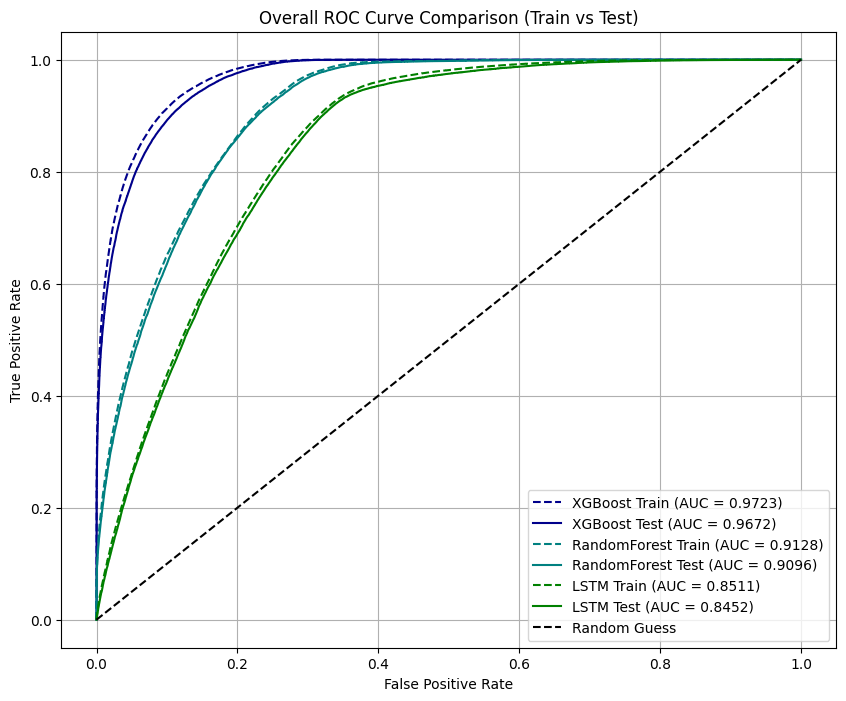


Metrics Comparison (Train vs Test):

Accuracy:
XGBoost: Train = 0.9136, Test = 0.9043, Difference (Train - Test) = 0.0093
RandomForest: Train = 0.8322, Test = 0.8280, Difference (Train - Test) = 0.0043
LSTM: Train = 0.7770, Test = 0.7729, Difference (Train - Test) = 0.0041

Precision:
XGBoost: Train = 0.8994, Test = 0.8767, Difference (Train - Test) = 0.0227
RandomForest: Train = 0.6459, Test = 0.6458, Difference (Train - Test) = 0.0001
LSTM: Train = 0.3630, Test = 0.3586, Difference (Train - Test) = 0.0044

Recall:
XGBoost: Train = 0.8825, Test = 0.8547, Difference (Train - Test) = 0.0277
RandomForest: Train = 0.4860, Test = 0.4820, Difference (Train - Test) = 0.0040
LSTM: Train = 0.3416, Test = 0.3622, Difference (Train - Test) = -0.0206

F1:
XGBoost: Train = 0.8908, Test = 0.8653, Difference (Train - Test) = 0.0254
RandomForest: Train = 0.5285, Test = 0.5221, Difference (Train - Test) = 0.0064
LSTM: Train = 0.3517, Test = 0.3603, Difference (Train - Test) = -0.0086

Roc_auc:
XGBoos

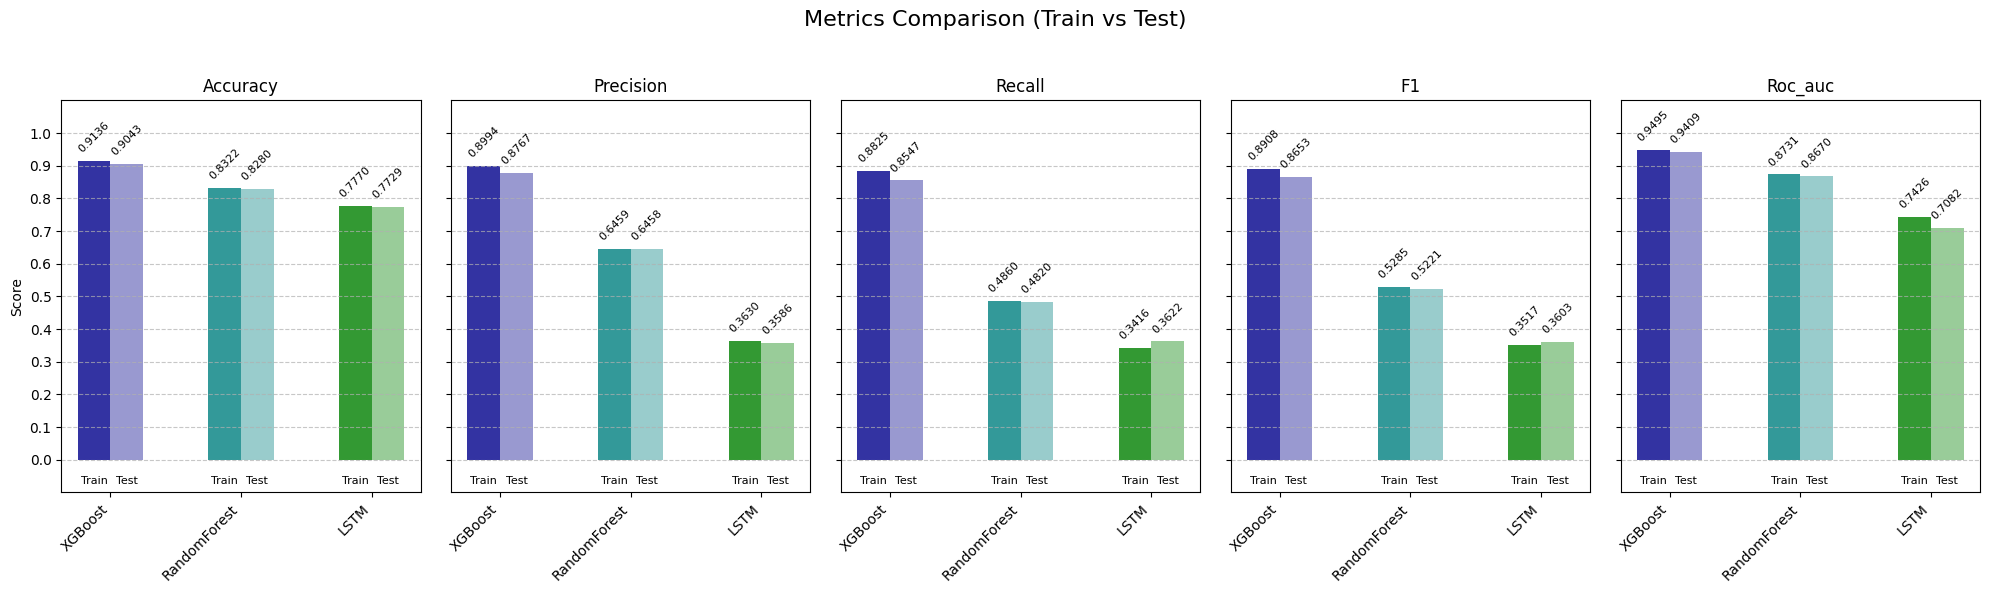

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import os
import traceback

# Create directory for saving ROC plots and metrics comparison plots
plot_dir = r'C:\Users\Hp\Desktop\LJMU_research\Final Thesis\plots'
os.makedirs(plot_dir, exist_ok=True)

# Initialize dictionaries to store metrics for training and test data
train_metrics_dict = {'XGBoost': {}, 'RandomForest': {}, 'LSTM': {}}
test_metrics_dict = {'XGBoost': {}, 'RandomForest': {}, 'LSTM': {}}

# Function to compute metrics for a given dataset
def compute_metrics(y_true, y_pred, y_pred_proba=None):
    metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='binary', zero_division=0),
        'recall': recall_score(y_true, y_pred, average='binary', zero_division=0),
        'f1': f1_score(y_true, y_pred, average='binary', zero_division=0),
    }
    if y_pred_proba is not None:
        metrics['roc_auc'] = roc_auc_score(y_true, y_pred_proba)
    return metrics

# Verify required variables exist
required_vars = ['X_train', 'X_test', 'y_train', 'y_test', 'X_train_lstm', 'X_test_lstm',
                'y_train_lstm', 'y_test_lstm', 'models_per_target', 'target_cols']
missing_vars = [var for var in required_vars if var not in globals()]
if missing_vars:
    print(f"Error: Missing required variables: {missing_vars}")
else:
    try:
        # Dictionaries to store overall predictions and probabilities for ROC curves
        overall_train_true = {'XGBoost': [], 'RandomForest': [], 'LSTM': []}
        overall_train_proba = {'XGBoost': [], 'RandomForest': [], 'LSTM': []}
        overall_test_true = {'XGBoost': [], 'RandomForest': [], 'LSTM': []}
        overall_test_proba = {'XGBoost': [], 'RandomForest': [], 'LSTM': []}

        # Evaluate metrics for each model and target
        for model_name, model_list in models_per_target.items():
            print(f"\nEvaluating {model_name}...")
            is_lstm = model_name == 'LSTM'

            # Select appropriate data based on model type
            X_train_data = X_train_lstm if is_lstm else X_train
            X_test_data = X_test_lstm if is_lstm else X_test
            y_train_data = y_train_lstm if is_lstm else y_train
            y_test_data = y_test_lstm if is_lstm else y_test

            # Initialize dictionaries for each target
            train_metrics_dict[model_name] = {target: {} for target in target_cols}
            test_metrics_dict[model_name] = {target: {} for target in target_cols}

            for j, target in enumerate(target_cols):
                # Get true labels for the target
                y_train_target = y_train_data[:, j] if is_lstm else y_train[target]
                y_test_target = y_test_data[:, j] if is_lstm else y_test[target]

                if is_lstm:
                    # LSTM predictions
                    model = model_list  # Single LSTM model
                    train_pred = model.predict(X_train_data, verbose=0)
                    test_pred = model.predict(X_test_data, verbose=0)
                    train_pred_binary = (train_pred[:, j] > 0.5).astype(int)
                    test_pred_binary = (test_pred[:, j] > 0.5).astype(int)
                    train_pred_proba = train_pred[:, j]
                    test_pred_proba = test_pred[:, j]
                else:
                    # Tree-based model predictions
                    model = model_list[j]  # Model specific to the target
                    train_pred_binary = model.predict(X_train_data)
                    test_pred_binary = model.predict(X_test_data)
                    train_pred_proba = model.predict_proba(X_train_data)[:, 1]
                    test_pred_proba = model.predict_proba(X_test_data)[:, 1]

                # Compute metrics for each target
                train_metrics_dict[model_name][target] = compute_metrics(y_train_target, train_pred_binary, train_pred_proba)
                test_metrics_dict[model_name][target] = compute_metrics(y_test_target, test_pred_binary, test_pred_proba)

                # Collect predictions for overall ROC curve
                overall_train_true[model_name].extend(y_train_target)
                overall_train_proba[model_name].extend(train_pred_proba)
                overall_test_true[model_name].extend(y_test_target)
                overall_test_proba[model_name].extend(test_pred_proba)

        # Plot overall ROC curves for each model
        plt.figure(figsize=(10, 8))
        colors = {'XGBoost': 'darkblue', 'RandomForest': 'teal', 'LSTM': 'green'}
        for model_name in models_per_target.keys():
            train_fpr, train_tpr, _ = roc_curve(overall_train_true[model_name], overall_train_proba[model_name])
            train_roc_auc = roc_auc_score(overall_train_true[model_name], overall_train_proba[model_name])

            test_fpr, test_tpr, _ = roc_curve(overall_test_true[model_name], overall_test_proba[model_name])
            test_roc_auc = roc_auc_score(overall_test_true[model_name], overall_test_proba[model_name])

            plt.plot(train_fpr, train_tpr, color=colors[model_name], linestyle='--',
                     label=f'{model_name} Train (AUC = {train_roc_auc:.4f})')
            plt.plot(test_fpr, test_tpr, color=colors[model_name], linestyle='-',
                     label=f'{model_name} Test (AUC = {test_roc_auc:.4f})')

        plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Overall ROC Curve Comparison (Train vs Test)')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.savefig(os.path.join(plot_dir, 'overall_roc_comparison.png'))
        plt.show()
        plt.close()

        # Compare metrics and prepare data for visualization
        print("\nMetrics Comparison (Train vs Test):")
        metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
        models = list(train_metrics_dict.keys())
        train_values = {metric: [] for metric in metrics_to_plot}
        test_values = {metric: [] for metric in metrics_to_plot}

        for metric in metrics_to_plot:
            print(f"\n{metric.capitalize()}:")
            for model_name in train_metrics_dict:
                try:
                    train_avg = np.mean([train_metrics_dict[model_name][target][metric] for target in target_cols])
                    test_avg = np.mean([test_metrics_dict[model_name][target][metric] for target in target_cols])
                    print(f"{model_name}: Train = {train_avg:.4f}, Test = {test_avg:.4f}, Difference (Train - Test) = {train_avg - test_avg:.4f}")
                    train_values[metric].append(train_avg)
                    test_values[metric].append(test_avg)
                except KeyError as e:
                    print(f"Error computing {metric} for {model_name}: Missing key {e}")
                    train_values[metric].append(0)
                    test_values[metric].append(0)

        # Visualize Metrics Comparison with Improved Readability
        fig, axes = plt.subplots(1, len(metrics_to_plot), figsize=(20, 6), sharey=True)
        fig.suptitle('Metrics Comparison (Train vs Test)', fontsize=16)

        bar_width = 0.3  # Reduced bar width for better spacing
        index = np.arange(len(models)) * 1.2  # Increased spacing between model groups
        model_colors = {'XGBoost': 'darkblue', 'RandomForest': 'teal', 'LSTM': 'green'}

        for idx, (metric, ax) in enumerate(zip(metrics_to_plot, axes)):
            # Plot train and test bars side by side for each model
            for i, model in enumerate(models):
                train_val = train_values[metric][i]
                test_val = test_values[metric][i]
                ax.bar(index[i], train_val, bar_width, color=model_colors[model], alpha=0.8)
                ax.bar(index[i] + bar_width, test_val, bar_width, color=model_colors[model], alpha=0.4)

                # Add "Train" and "Test" labels below each bar
                ax.text(index[i], -0.05, 'Train', ha='center', va='top', fontsize=8, color='black')
                ax.text(index[i] + bar_width, -0.05, 'Test', ha='center', va='top', fontsize=8, color='black')

                # Add value labels on top of bars, rotated for readability
                ax.text(index[i], train_val + 0.02, f'{train_val:.4f}', ha='center', va='bottom', fontsize=8, rotation=45)
                ax.text(index[i] + bar_width, test_val + 0.02, f'{test_val:.4f}', ha='center', va='bottom', fontsize=8, rotation=45)

            # Add model labels on x-axis
            ax.set_xticks(index + bar_width / 2)
            ax.set_xticklabels(models, rotation=45, ha='right')

            # Add metric title
            ax.set_title(metric.capitalize())

            # Add grid and adjust y-axis with specific score markings
            ax.grid(True, axis='y', linestyle='--', alpha=0.7)
            ax.set_ylim(-0.1, 1.1)  # Extend y-axis to accommodate labels below bars
            ax.set_yticks(np.arange(0, 1.1, 0.1))  # Set y-axis ticks at 0.1 intervals

            if idx == 0:
                ax.set_ylabel('Score')

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.savefig(os.path.join(plot_dir, 'metrics_comparison.png'))
        plt.show()
        plt.close()

    except Exception as e:
        print(f"Error during evaluation: {str(e)}")
        traceback.print_exc()